In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [354]:
df = pd.read_csv("/content/zomato_cleaned.csv")
df.head()

rider_id  rider_age  rider_ratings  restaurant_lat  restaurant_long  \
0   DEHRES17DEL01       36.0            4.2       30.327968        78.046106   
1   KOCRES16DEL01       21.0            4.7       10.003064        76.307589   
2  PUNERES13DEL03       23.0            4.7       18.562450        73.916619   
3  LUDHRES15DEL02       34.0            4.3       30.899584        75.809346   
4   KNPRES14DEL02       24.0            4.7       26.463504        80.372929   

   location_lat  location_long  order_date Time_Orderd     weather  ...  \
0     30.397968      78.116106  2022-02-12       21:55         fog  ...   
1     10.043064      76.347589  2022-02-13       14:55      stormy  ...   
2     18.652450      74.006619  2022-03-04       17:30  sandstorms  ...   
3     30.919584      75.829346  2022-02-13       09:20  sandstorms  ...   
4     26.593504      80.502929  2022-02-14       19:50         fog  ...   

  order_month  day_name is_weekend order_time  order_pickup_time  \
0           2  saturday          1      21:55              22:10   
1           2    sunday          1      14:55              15:05   
2           3    friday          0      17:30              17:40   
3           2    sunday          1      09:20              09:30   
4           2    monday          0      19:50              20:05   

      time_of_day  order_hour prep_time_minutes   distance  distance_bin  
0     dinner_peak          21              15.0  10.280582          long  
1       afternoon          14              10.0   6.242319        medium  
2  evening_snacks          17              10.0  13.787860          long  
3       breakfast           9              10.0   2.930258         short  
4  evening_snacks          19              15.0  19.396618     very_long  

[5 rows x 30 columns]

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43585 entries, 0 to 43584
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_id             43585 non-null  object 
 1   rider_age            43585 non-null  float64
 2   rider_ratings        43585 non-null  float64
 3   restaurant_lat       40100 non-null  float64
 4   restaurant_long      40100 non-null  float64
 5   location_lat         40100 non-null  float64
 6   location_long        40100 non-null  float64
 7   order_date           43585 non-null  object 
 8   Time_Orderd          43585 non-null  object 
 9   weather              43585 non-null  object 
 10  traffic_density      43585 non-null  object 
 11  vehicle_condition    43585 non-null  int64  
 12  order_type           43585 non-null  object 
 13  vehicle_type         43585 non-null  object 
 14  multiple_deliveries  42652 non-null  float64
 15  festival             43368 non-null 

In [356]:
df.isna().sum()

rider_id                  0
rider_age                 0
rider_ratings             0
restaurant_lat         3485
restaurant_long        3485
location_lat           3485
location_long          3485
order_date                0
Time_Orderd               0
weather                   0
traffic_density           0
vehicle_condition         0
order_type                0
vehicle_type              0
multiple_deliveries     933
festival                217
time_taken                0
city_name                 0
city_type              1135
order_day                 0
order_month               0
day_name                  0
is_weekend                0
order_time                0
order_pickup_time         0
time_of_day               0
order_hour                0
prep_time_minutes         0
distance               3485
distance_bin           3485
dtype: int64

In [357]:
missing_values = df.isnull().any(axis=1).sum()
missing_values

np.int64(5530)

In [358]:
df.duplicated().sum()

np.int64(0)

In [359]:
df.dtypes

rider_id                object
rider_age              float64
rider_ratings          float64
restaurant_lat         float64
restaurant_long        float64
location_lat           float64
location_long          float64
order_date              object
Time_Orderd             object
weather                 object
traffic_density         object
vehicle_condition        int64
order_type              object
vehicle_type            object
multiple_deliveries    float64
festival                object
time_taken               int64
city_name               object
city_type               object
order_day                int64
order_month              int64
day_name                object
is_weekend               int64
order_time              object
order_pickup_time       object
time_of_day             object
order_hour               int64
prep_time_minutes      float64
distance               float64
distance_bin            object
dtype: object

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43585 entries, 0 to 43584
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_id             43585 non-null  object 
 1   rider_age            43585 non-null  float64
 2   rider_ratings        43585 non-null  float64
 3   restaurant_lat       40100 non-null  float64
 4   restaurant_long      40100 non-null  float64
 5   location_lat         40100 non-null  float64
 6   location_long        40100 non-null  float64
 7   order_date           43585 non-null  object 
 8   Time_Orderd          43585 non-null  object 
 9   weather              43585 non-null  object 
 10  traffic_density      43585 non-null  object 
 11  vehicle_condition    43585 non-null  int64  
 12  order_type           43585 non-null  object 
 13  vehicle_type         43585 non-null  object 
 14  multiple_deliveries  42652 non-null  float64
 15  festival             43368 non-null 

In [361]:
num_cols = df.columns[[1,2,3,4,5,6,9,12,14,17,18,20,24,25,26]].tolist()
cat_cols = [col for col in df.columns.tolist() if col not in num_cols]
print("numerical features : ",len(num_cols) , "categorical features : ", len(cat_cols))

numerical features :  15 categorical features :  15


In [362]:
num_cols

['rider_age',
 'rider_ratings',
 'restaurant_lat',
 'restaurant_long',
 'location_lat',
 'location_long',
 'weather',
 'order_type',
 'multiple_deliveries',
 'city_name',
 'city_type',
 'order_month',
 'order_pickup_time',
 'time_of_day',
 'order_hour']

In [363]:
cat_cols

['rider_id',
 'order_date',
 'Time_Orderd',
 'traffic_density',
 'vehicle_condition',
 'vehicle_type',
 'festival',
 'time_taken',
 'order_day',
 'day_name',
 'is_weekend',
 'order_time',
 'prep_time_minutes',
 'distance',
 'distance_bin']

In [364]:
df[num_cols].describe()

rider_age  rider_ratings  restaurant_lat  restaurant_long  \
count  43585.000000   43585.000000    40100.000000     40100.000000   
mean      29.555489       4.635280       18.910301        76.917509   
std        5.760585       0.313851        5.470029         3.498139   
min       20.000000       2.500000        9.957144        72.768726   
25%       25.000000       4.500000       12.986047        73.898366   
50%       30.000000       4.700000       19.065838        76.618203   
75%       35.000000       4.900000       22.751234        78.347554   
max       39.000000       5.000000       30.914057        88.433452   

       location_lat  location_long  multiple_deliveries   order_month  \
count  40100.000000   40100.000000         42652.000000  43585.000000   
mean      18.973930      76.981138             0.743717      2.981026   
std        5.471837       3.498342             0.572836      0.545921   
min        9.967144      72.778726             0.000000      2.000000   
25%       13.065801      73.940492             0.000000      3.000000   
50%       19.123649      76.662449             1.000000      3.000000   
75%       22.820040      78.402621             1.000000      3.000000   
max       31.054057      88.563452             3.000000      4.000000   

         order_hour  
count  43585.000000  
mean      17.424986  
std        4.818910  
min        0.000000  
25%       15.000000  
50%       19.000000  
75%       21.000000  
max       23.000000

In [365]:
cat_summary = df[cat_cols].describe(include="object")
cat_summary

rider_id  order_date Time_Orderd traffic_density vehicle_type  \
count            43585       43585       43585           43585        43585   
unique            1320          44         176               4            3   
top     PUNERES01DEL01  2022-03-15       21:55             low   motorcycle   
freq                65        1139         459           14975        25480   

       festival   day_name order_time distance_bin  
count     43368      43585      43585        40100  
unique        2          7        176            4  
top          no  wednesday      21:55       medium  
freq      42516       6775        459        10822

In [366]:
import missingno as msno

<Axes: >

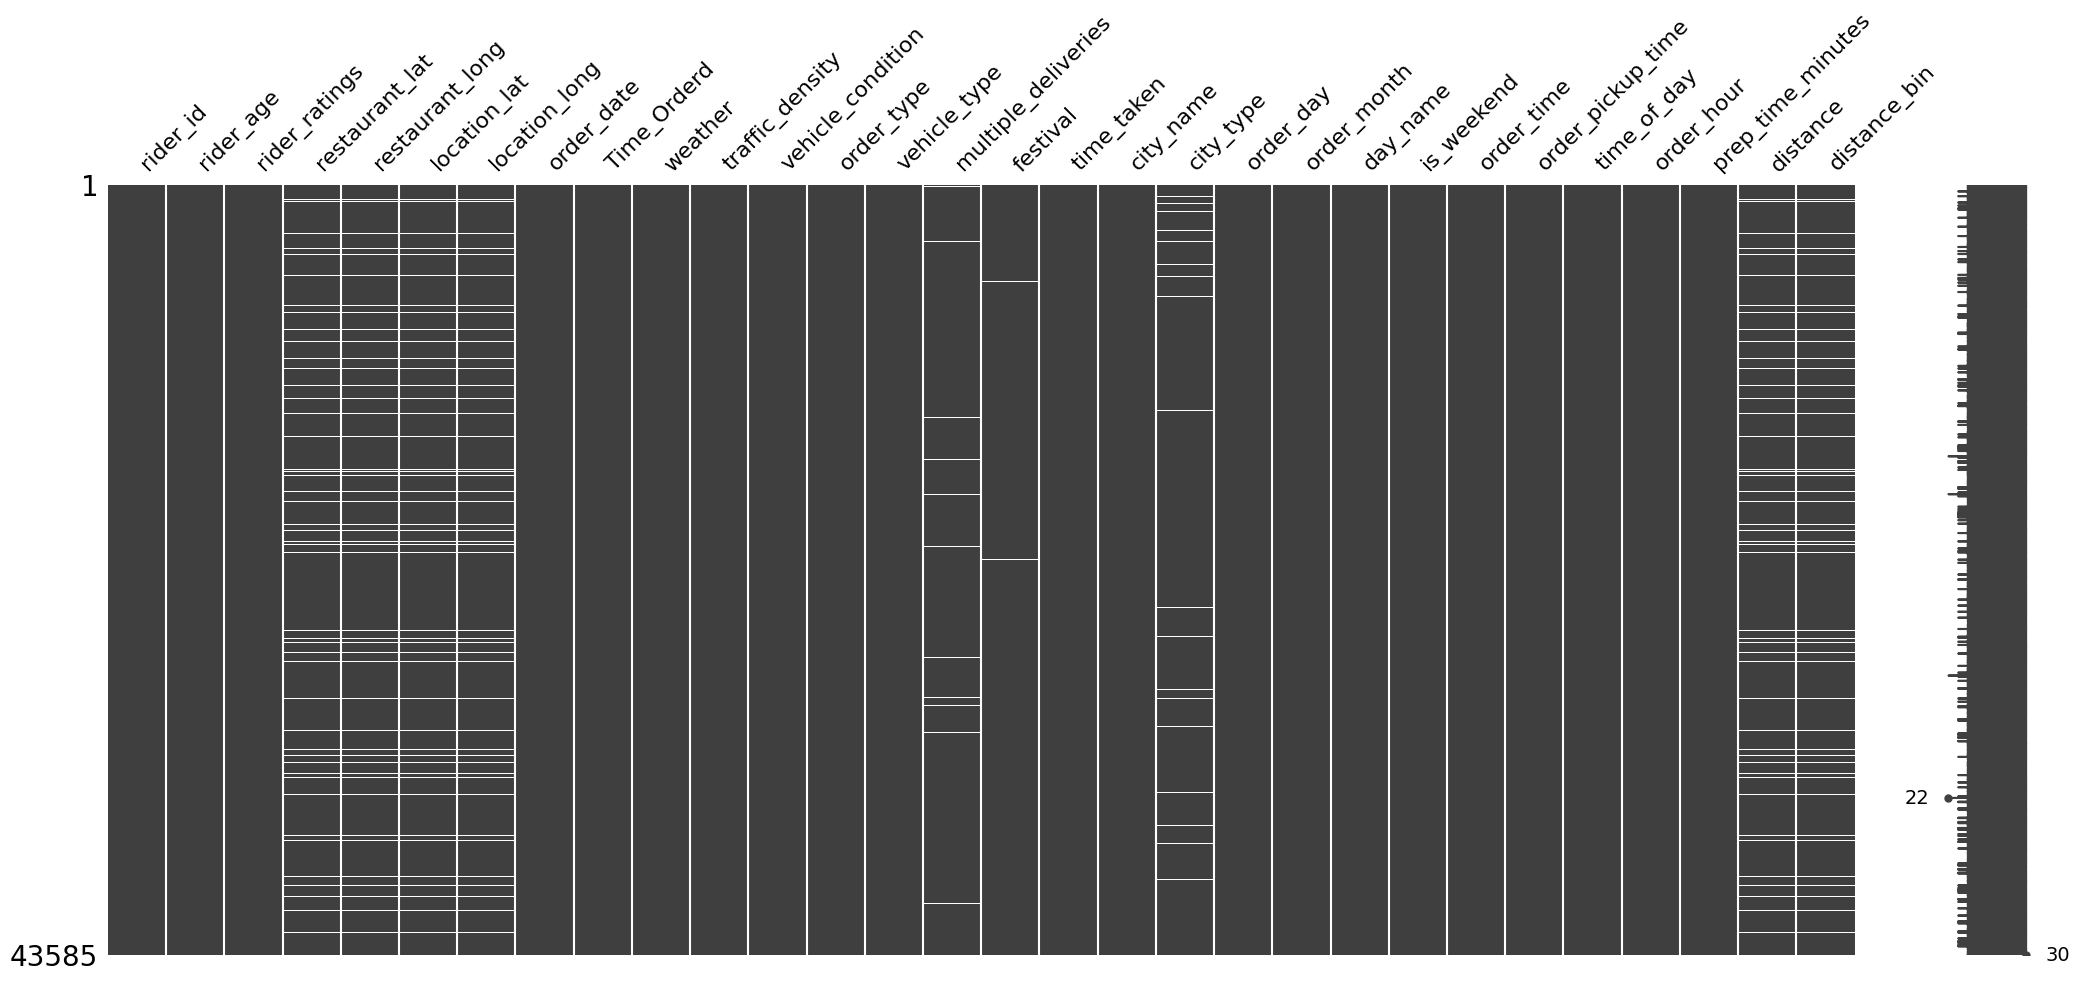

In [367]:
msno.matrix(df)

<Axes: >

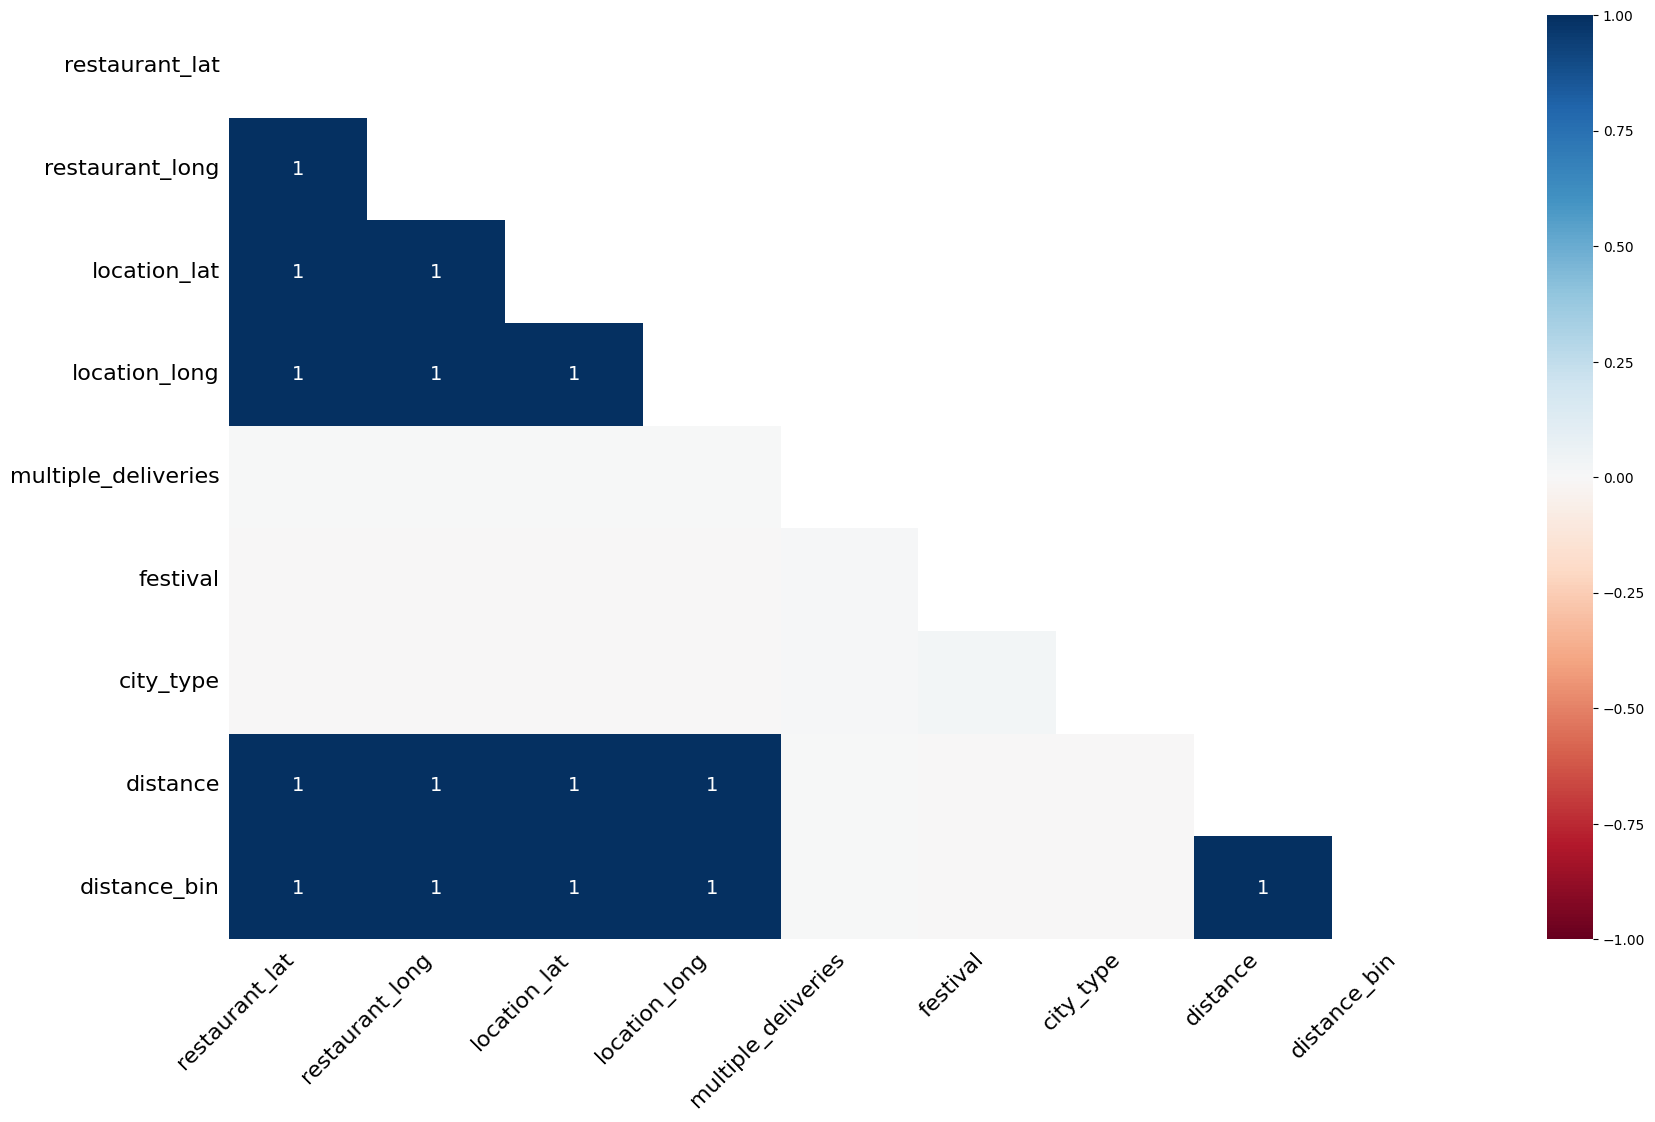

In [368]:
msno.heatmap(df)

<Axes: >

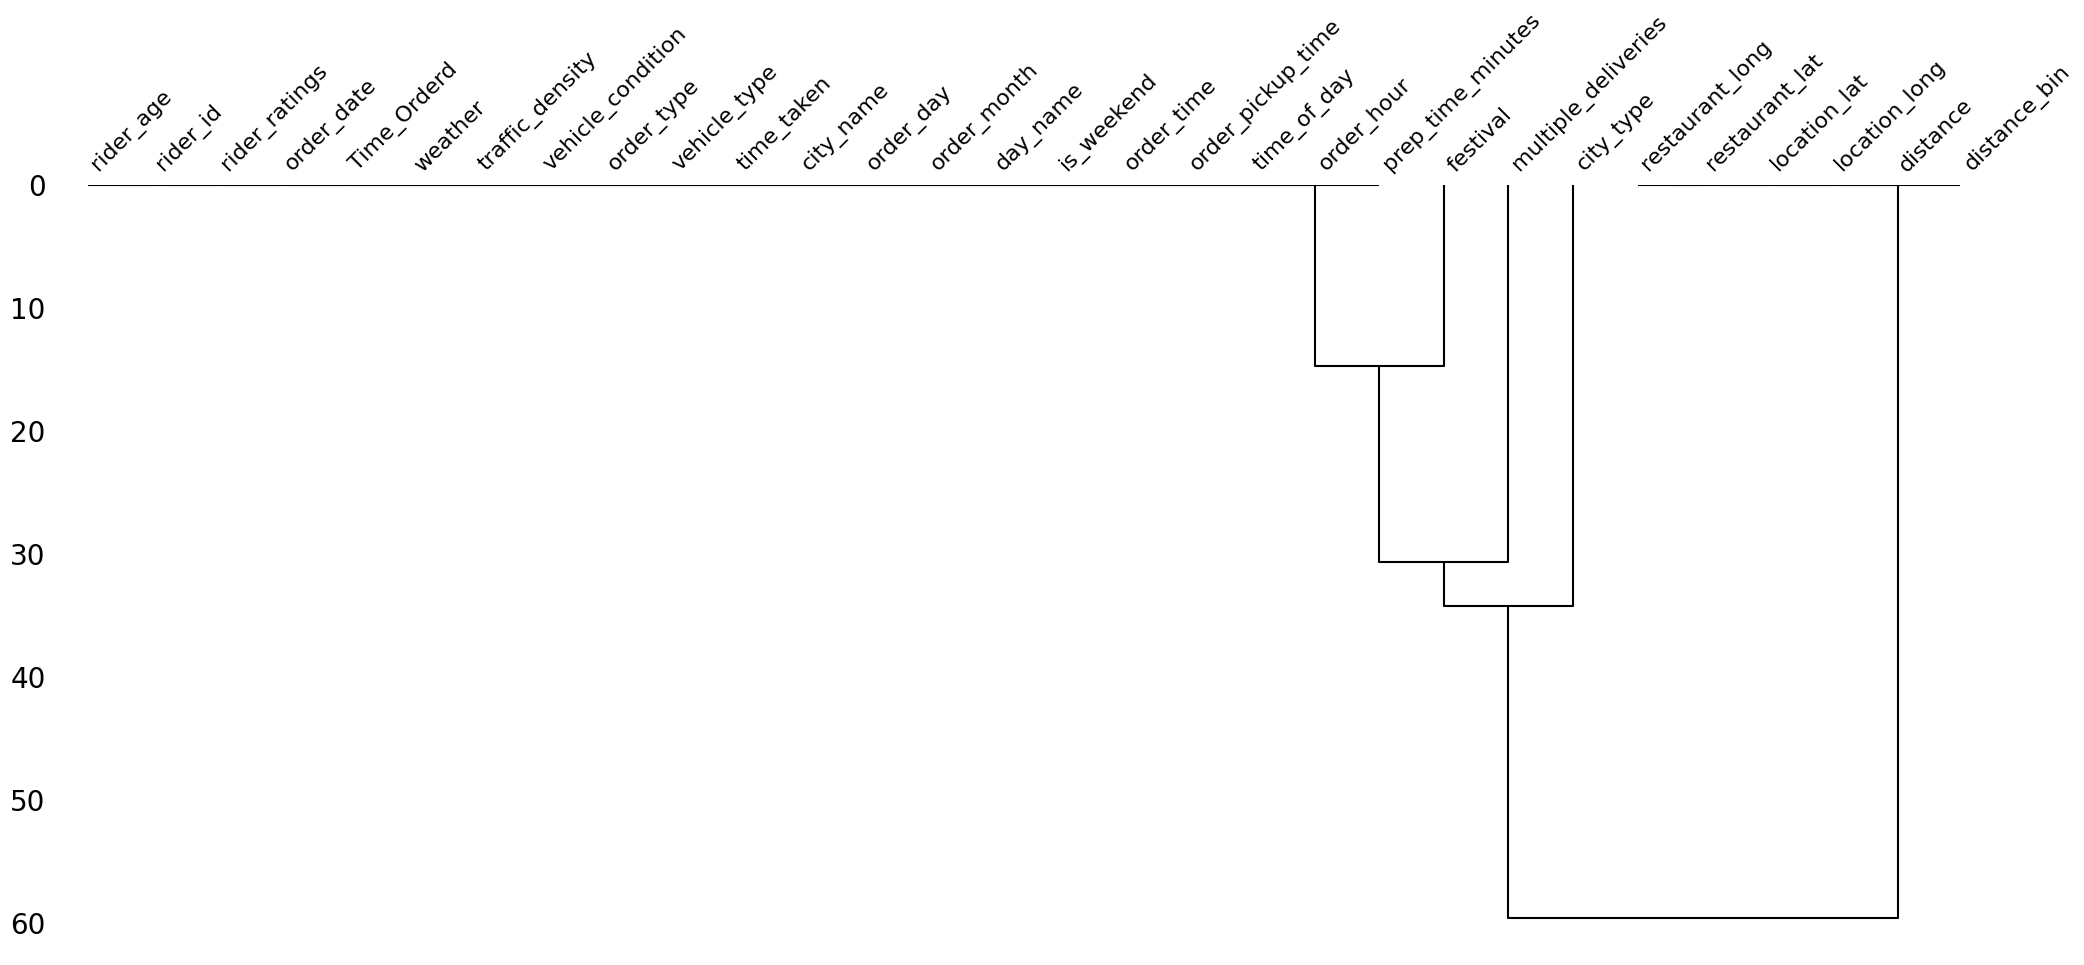

In [369]:
msno.dendrogram(df)

In [370]:
def numerical_analysis(df, num_col, hue=None, bins="auto"):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.kdeplot(data=df, x=num_col, hue=hue, ax=axes[0], fill=True)
    axes[0].set_title("Distribution (KDE)")

    sns.boxplot(data=df, x=num_col, hue=hue, ax=axes[1])
    axes[1].set_title("Boxplot")

    sns.histplot(
        data=df, x=num_col, hue=hue,
        bins=bins, kde=True, ax=axes[2]
    )
    axes[2].set_title("Histogram")

    plt.tight_layout()
    plt.show()


In [371]:
def numerical_categorical_analysis(df, cat_col, num_col):
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))

    sns.barplot(data=df, x=cat_col, y=num_col, ax=axes[0, 0])
    axes[0, 0].set_title("Mean by Category")

    sns.boxplot(data=df, x=cat_col, y=num_col, ax=axes[0, 1])
    axes[0, 1].set_title("Boxplot")

    sns.violinplot(data=df, x=cat_col, y=num_col, ax=axes[1, 0])
    axes[1, 0].set_title("Violin Plot")

    sns.stripplot(
        data=df, x=cat_col, y=num_col,
        jitter=True, alpha=0.5, ax=axes[1, 1]
    )
    axes[1, 1].set_title("Strip Plot")

    plt.tight_layout()
    plt.show()


In [372]:
def categorical_analysis(df, col):
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({
        "count": counts,
        "percentage": percentages.round(2)
    })

    display(summary)

    print(f"Number of categories: {df[col].nunique()}")
    print(f"Categories: {df[col].unique().tolist()}")

    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [373]:
def multivariate_analysis(df, num_col, cat_col_1, cat_col_2):
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))

    sns.barplot(
        data=df, x=cat_col_1, y=num_col,
        hue=cat_col_2, ax=axes[0, 0]
    )
    axes[0, 0].set_title("Mean comparison")

    sns.boxplot(
        data=df, x=cat_col_1, y=num_col,
        hue=cat_col_2, ax=axes[0, 1]
    )
    axes[0, 1].set_title("Distribution spread")

    sns.violinplot(
        data=df, x=cat_col_1, y=num_col,
        hue=cat_col_2, split=True, ax=axes[1, 0]
    )

    sns.stripplot(
        data=df, x=cat_col_1, y=num_col,
        hue=cat_col_2, dodge=True, alpha=0.4, ax=axes[1, 1]
    )

    plt.tight_layout()
    plt.show()


In [374]:
from scipy.stats import chi2_contingency

def chi_square_test(df, col1, col2, alpha=0.05):
    data = df[[col1, col2]].dropna()
    table = pd.crosstab(data[col1], data[col2])

    _, p_val, _, _ = chi2_contingency(table)

    display(table)
    print(f"P-value: {p_val:.5f}")

    if p_val <= alpha:
        print("Reject H0 → Significant association")
    else:
        print("Fail to reject H0 → No significant association")


In [375]:
from scipy.stats import f_oneway

def anova_test(df, num_col, cat_col, alpha=0.05):
    data = df[[num_col, cat_col]].dropna()

    groups = [
        group[num_col].values
        for _, group in data.groupby(cat_col)
    ]

    f_stat, p_val = f_oneway(*groups)

    print(f"P-value: {p_val:.5f}")

    if p_val <= alpha:
        print("Reject H0 → Significant difference between groups")
    else:
        print("Fail to reject H0 → No significant difference")


In [376]:
from scipy.stats import jarque_bera

def normality_test(df, col, alpha=0.05):
    data = df[col].dropna()

    stat, p_val = jarque_bera(data)

    print(f"Jarque–Bera p-value: {p_val:.5f}")

    if p_val <= alpha:
        print("Reject H0 → Not normally distributed")
    else:
        print("Fail to reject H0 → Normally distributed")


## time_taken

In [377]:
df["time_taken"].dtype

dtype('int64')

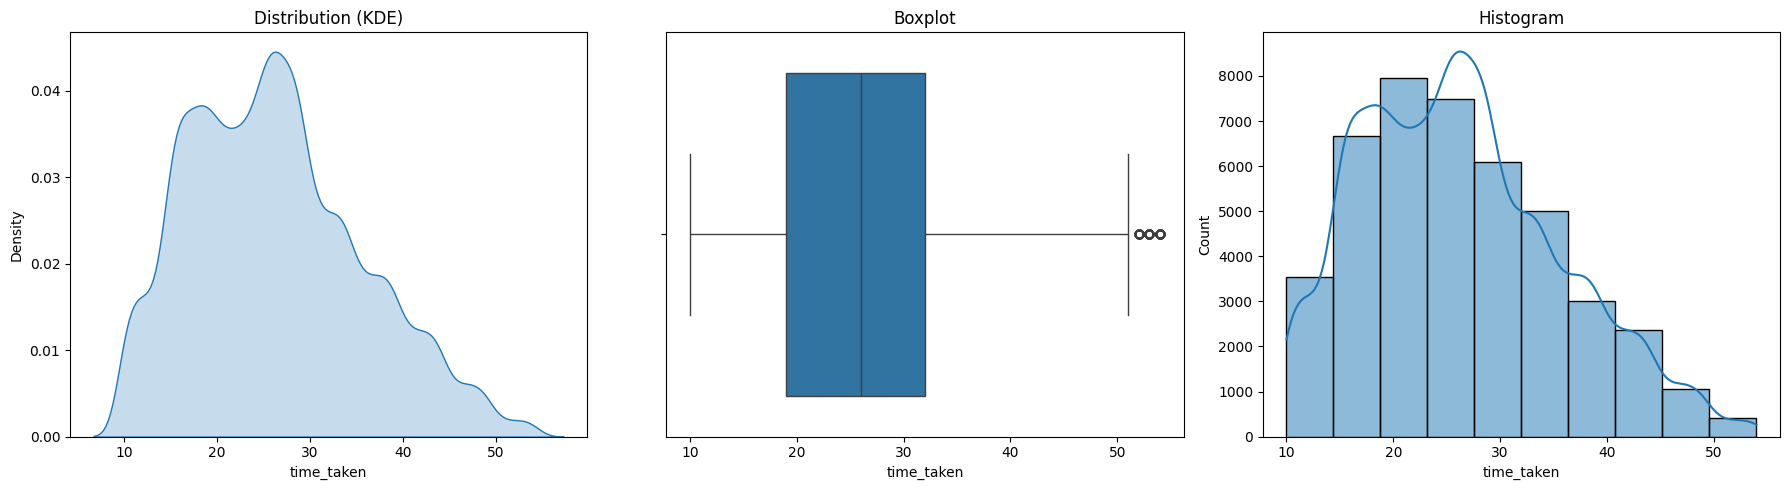

In [378]:
numerical_analysis(df, 'time_taken', bins = 10)

**Observations**

Delivery time is right-skewed, with most orders completed between 15–35 minutes.

The peak delivery time lies around 20–25 minutes.

Presence of high-value outliers (≈50+ minutes) indicates genuine delivery delays.

Distribution is non-normal, so median is more representative than mean.

Variability suggests strong influence of factors like distance, traffic, and time of day.

**Modeling Note**

Tree-based models are suitable due to skewed target.

Outliers should be retained as they reflect real-world behavior.

In [379]:
import matplotlib.pyplot as plt
import scipy.stats as stats

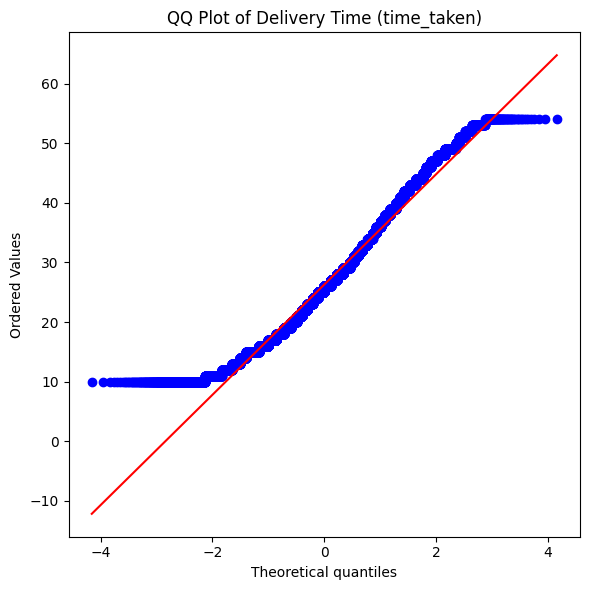

In [380]:
plt.figure(figsize=(6, 6))
stats.probplot(df["time_taken"].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of Delivery Time (time_taken)")
plt.tight_layout()
plt.show()

**QQ Plot Observations (time_taken)**

The points deviate noticeably from the reference line, especially at the upper tail, indicating right skewness.

The lower tail is compressed, suggesting a lower bound on delivery time.

The distribution does not follow a normal distribution, as evidenced by systematic curvature.

Extreme delivery times contribute to heavy tails, reflecting real-world delays.

In [381]:
normality_test(df, 'time_taken')

Jarque–Bera p-value: 0.00000
Reject H0 → Not normally distributed


In [382]:
q1 = df["time_taken"].quantile(0.25)
q3 = df["time_taken"].quantile(0.75)

iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

df[df["time_taken"] > upper_bound]["traffic_density"].value_counts()


traffic_density
jam     230
high     23
Name: count, dtype: int64

In [383]:
df.loc[(df['time_taken'] > upper_bound),"weather"].value_counts()

weather
fog           57
sunny         49
windy         41
cloudy        41
stormy        33
sandstorms    32
Name: count, dtype: int64

In [384]:
avg_distance = df["distance"].mean()
avg_distance_extreme = df.loc[
    df["time_taken"] > upper_bound, "distance"
].mean()

print(avg_distance, avg_distance_extreme)

9.714540940843854 13.19839907590643


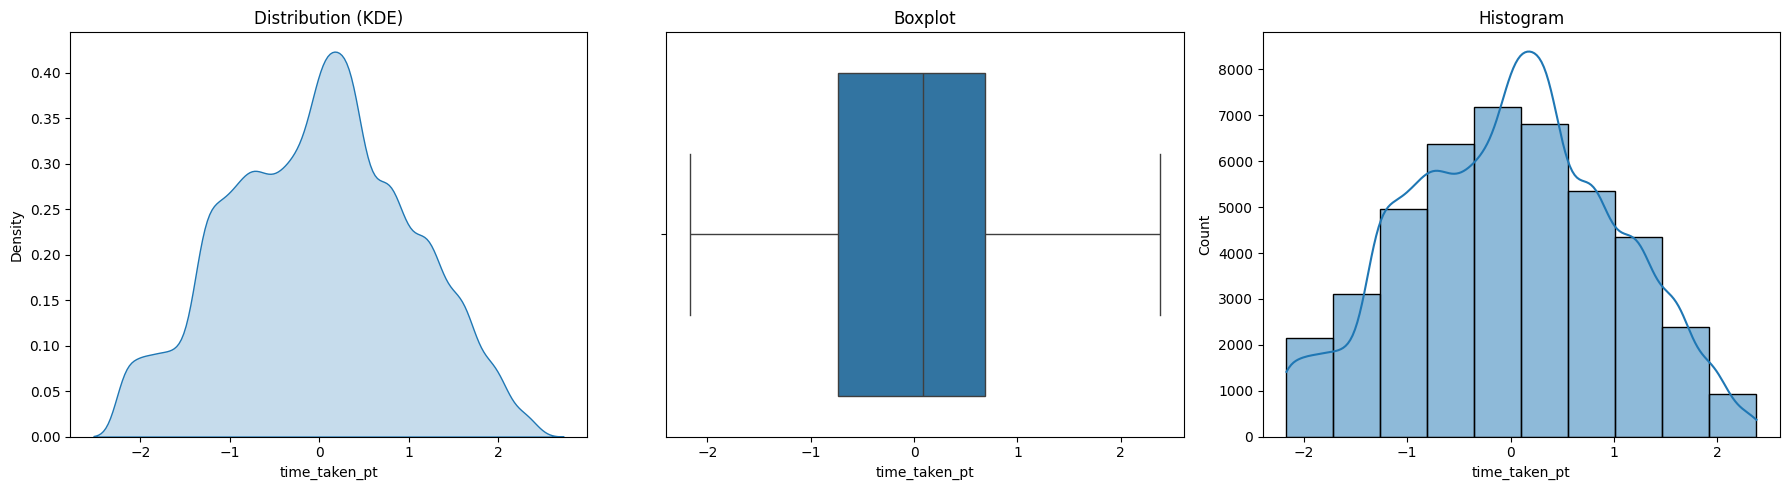

In [385]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson")

df["time_taken_pt"] = pt.fit_transform(
    df[["time_taken"]]
)

numerical_analysis(df, "time_taken_pt", bins=10)


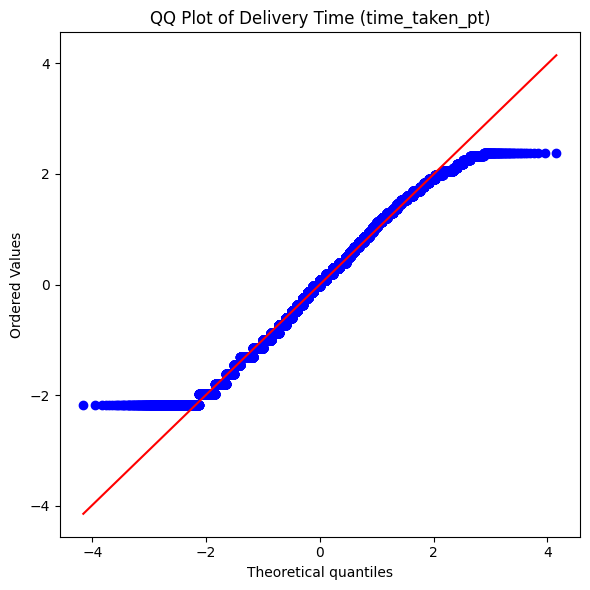

In [386]:
plt.figure(figsize=(6, 6))
stats.probplot(df["time_taken_pt"].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of Delivery Time (time_taken_pt)")
plt.tight_layout()
plt.show()

## rider_age

In [387]:
df["rider_age"].describe()

count    43585.000000
mean        29.555489
std          5.760585
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: rider_age, dtype: float64

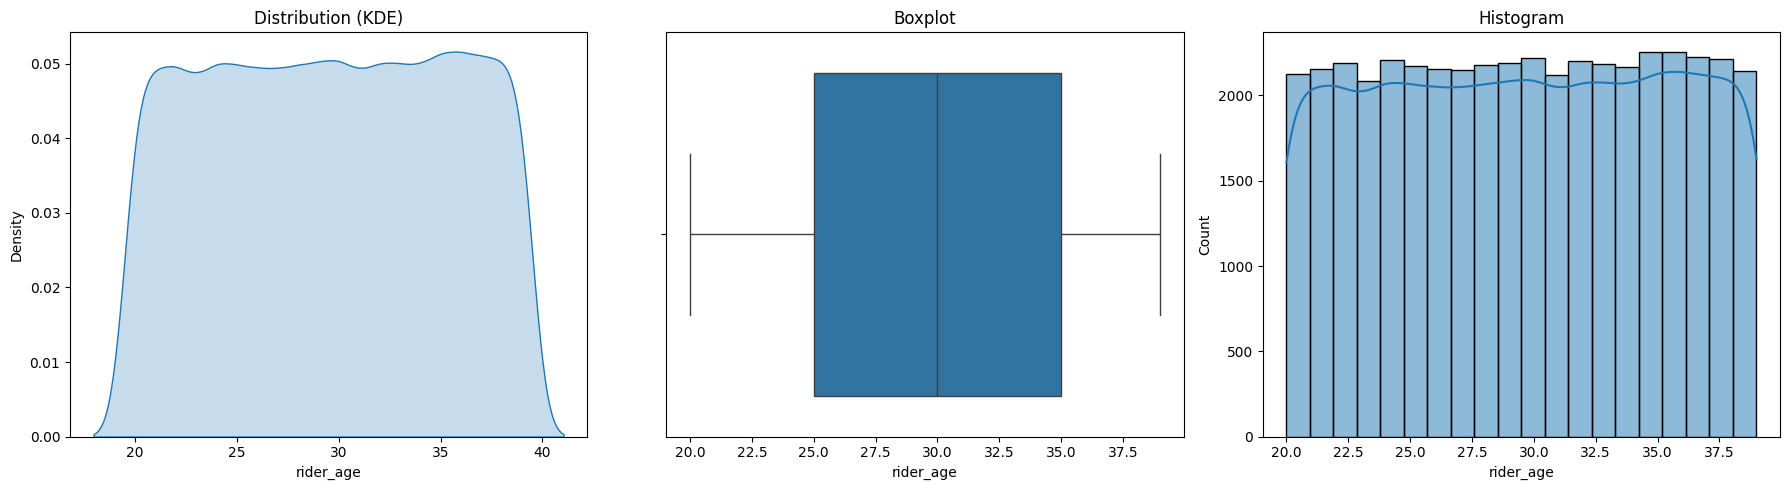

In [388]:
numerical_analysis(df, 'rider_age', bins=20)

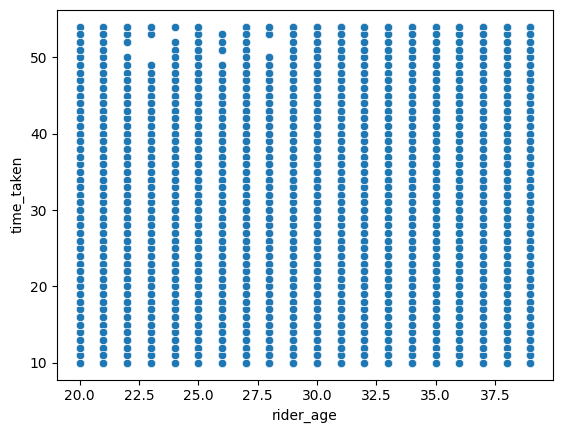

In [389]:
sns.scatterplot(data=df, x="rider_age", y='time_taken')
plt.show()

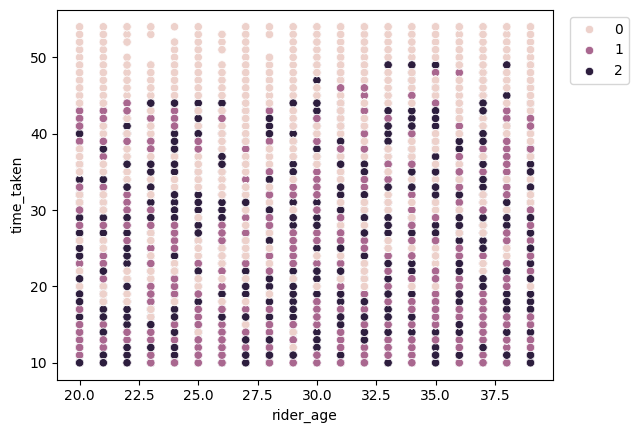

In [390]:
sns.scatterplot(data=df, x="rider_age", y="time_taken", hue="vehicle_condition")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

<Axes: xlabel='vehicle_type', ylabel='rider_age'>

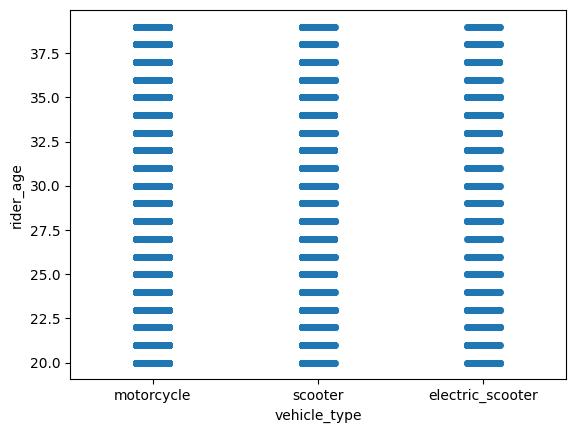

In [391]:
sns.stripplot(df, x="vehicle_type", y  ="rider_age")

## rider_ratings

In [392]:
df["rider_ratings"].describe()

count    43585.000000
mean         4.635280
std          0.313851
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: rider_ratings, dtype: float64

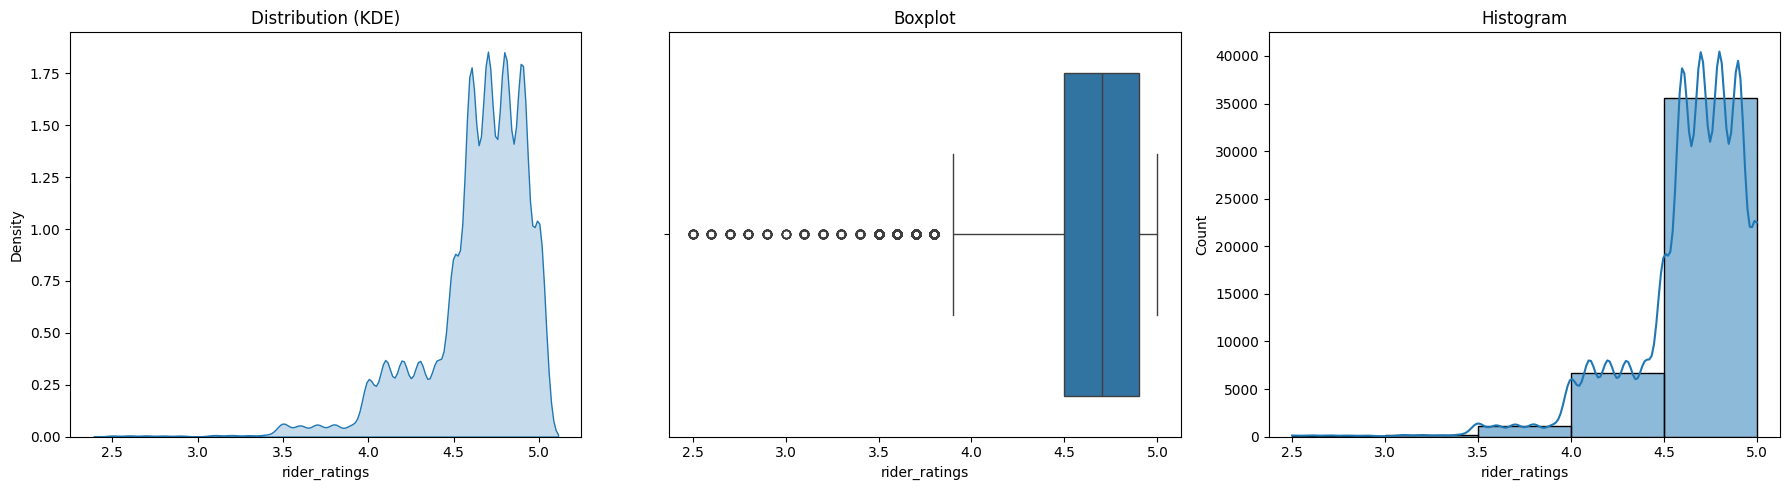

In [393]:
numerical_analysis(df, 'rider_ratings', bins=5)

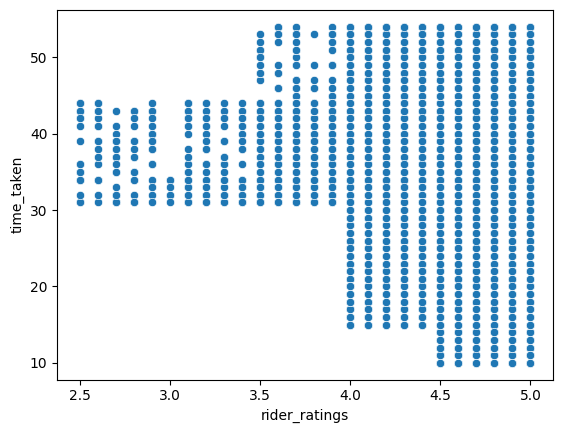

In [394]:
sns.scatterplot(data=df, x="rider_ratings", y='time_taken')
plt.show()

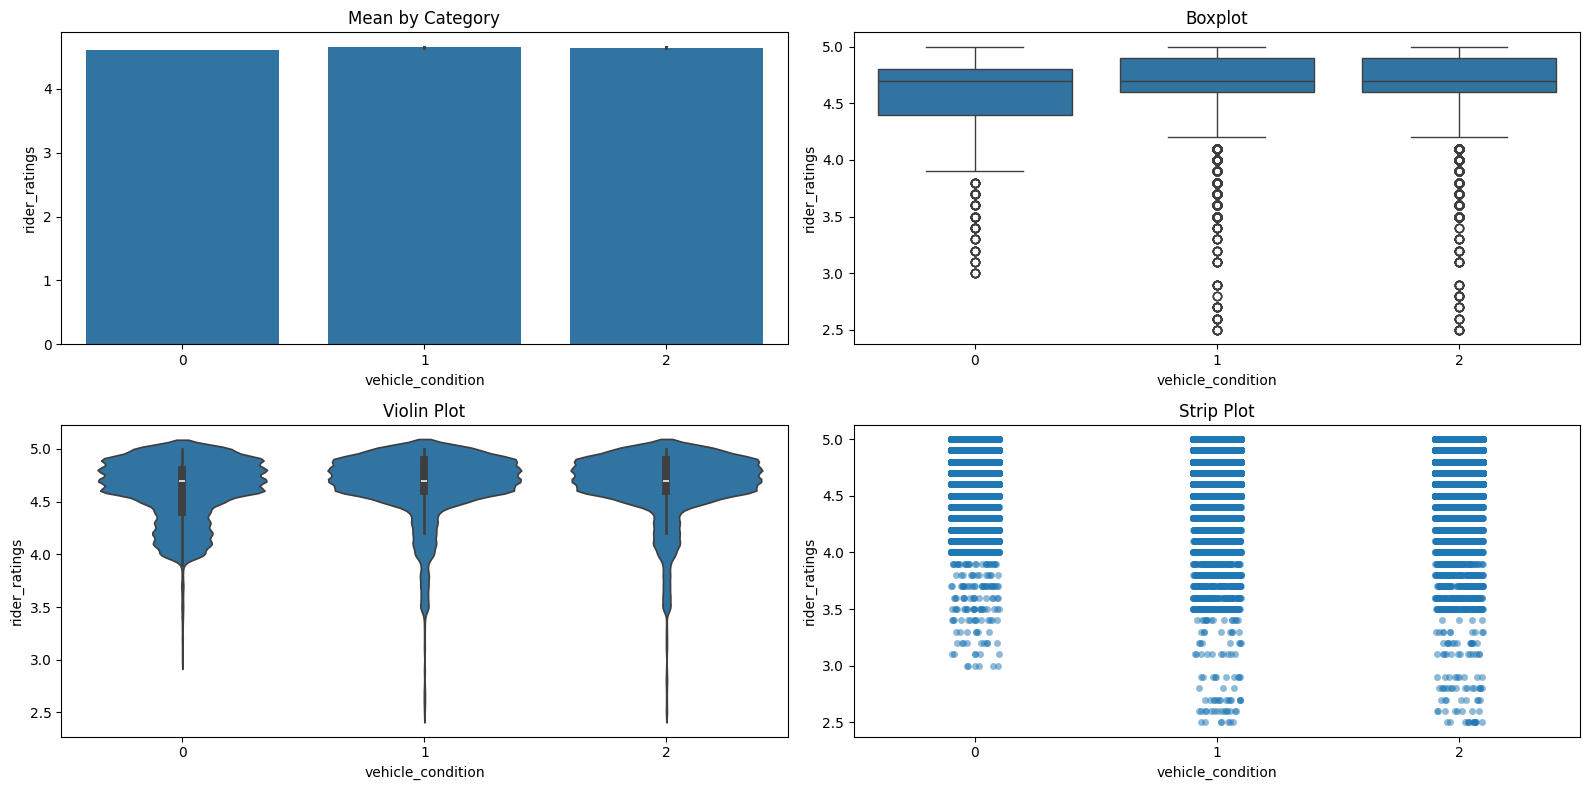

In [395]:
numerical_categorical_analysis(df, 'vehicle_condition', 'rider_ratings')

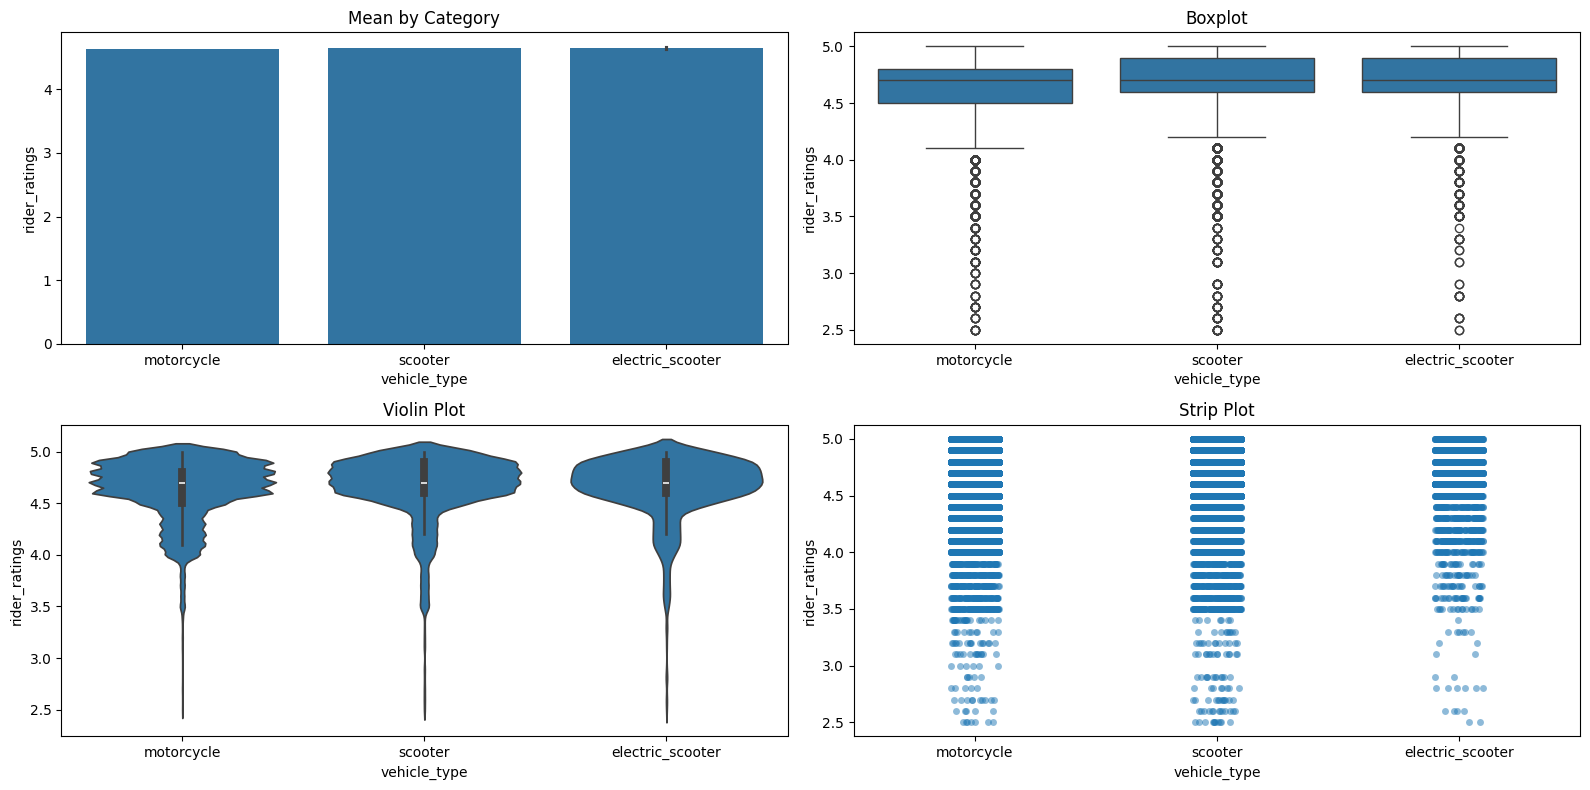

In [396]:
numerical_categorical_analysis(df, 'vehicle_type', 'rider_ratings')

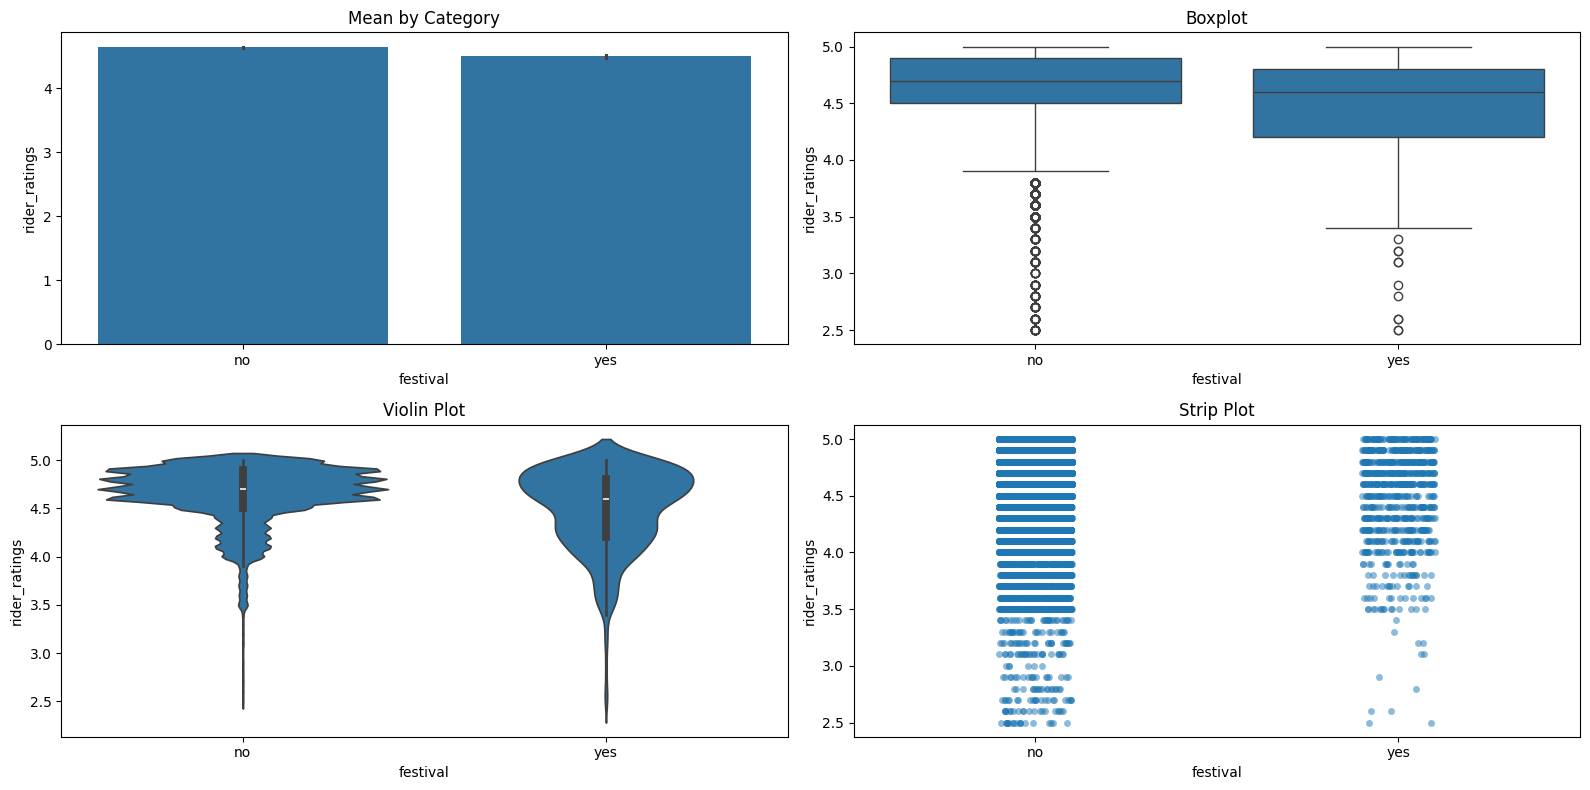

In [397]:
numerical_categorical_analysis(df, 'festival', 'rider_ratings')

## location based features

In [398]:
df.columns[3:7].tolist() + ["city_name"]

['restaurant_lat',
 'restaurant_long',
 'location_lat',
 'location_long',
 'city_name']

In [399]:
location_subset = df.loc[:,df.columns[3:7].tolist() + ["city_name"]]

location_subset

restaurant_lat  restaurant_long  location_lat  location_long  \
0           30.327968        78.046106     30.397968      78.116106   
1           10.003064        76.307589     10.043064      76.347589   
2           18.562450        73.916619     18.652450      74.006619   
3           30.899584        75.809346     30.919584      75.829346   
4           26.463504        80.372929     26.593504      80.502929   
...               ...              ...           ...            ...   
43580       26.902328        75.794257     26.912328      75.804257   
43581             NaN              NaN           NaN            NaN   
43582       13.022394        80.242439     13.052394      80.272439   
43583       11.001753        76.986241     11.041753      77.026241   
43584       23.351058        85.325731     23.431058      85.405731   

        city_name  
0        dehradun  
1           kochi  
2            pune  
3        ludhiana  
4          kanpur  
...           ...  
43580      jaipur  
43581        agra  
43582     chennai  
43583  coimbatore  
43584      ranchi  

[43585 rows x 5 columns]

In [400]:
location_subset.dtypes

restaurant_lat     float64
restaurant_long    float64
location_lat       float64
location_long      float64
city_name           object
dtype: object

In [401]:
location_subset.dropna(inplace=True)
location_subset

restaurant_lat  restaurant_long  location_lat  location_long  \
0           30.327968        78.046106     30.397968      78.116106   
1           10.003064        76.307589     10.043064      76.347589   
2           18.562450        73.916619     18.652450      74.006619   
3           30.899584        75.809346     30.919584      75.829346   
4           26.463504        80.372929     26.593504      80.502929   
...               ...              ...           ...            ...   
43579       23.371292        85.327872     23.481292      85.437872   
43580       26.902328        75.794257     26.912328      75.804257   
43582       13.022394        80.242439     13.052394      80.272439   
43583       11.001753        76.986241     11.041753      77.026241   
43584       23.351058        85.325731     23.431058      85.405731   

        city_name  
0        dehradun  
1           kochi  
2            pune  
3        ludhiana  
4          kanpur  
...           ...  
43579      ranchi  
43580      jaipur  
43582     chennai  
43583  coimbatore  
43584      ranchi  

[40100 rows x 5 columns]

In [402]:
import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat="location_lat",
    lon="location_long",
    hover_name="city_name",
    title="Delivery Locations Across India",
    zoom=3
)

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 20.5937, "lon": 78.9629},
    margin={"r":0, "t":40, "l":0, "b":0}
)

fig.show()


# order_date

In [403]:
df.filter(like='order')

order_date order_type  order_day  order_month order_time  \
0      2022-02-12      snack         12            2      21:55   
1      2022-02-13       meal         13            2      14:55   
2      2022-03-04     drinks          4            3      17:30   
3      2022-02-13     buffet         13            2      09:20   
4      2022-02-14      snack         14            2      19:50   
...           ...        ...        ...          ...        ...   
43580  2022-03-24       meal         24            3      11:35   
43581  2022-02-16     buffet         16            2      19:55   
43582  2022-03-11     drinks         11            3      23:50   
43583  2022-03-07      snack          7            3      13:35   
43584  2022-03-02      snack          2            3      17:10   

      order_pickup_time  order_hour  
0                 22:10          21  
1                 15:05          14  
2                 17:40          17  
3                 09:30           9  
4                 20:05          19  
...                 ...         ...  
43580             11:45          11  
43581             20:10          19  
43582             00:05          23  
43583             13:40          13  
43584             17:15          17  

[43585 rows x 7 columns]

In [404]:
order_date_subset = df.loc[:,["order_date","order_day","order_month","day_name","is_weekend","festival"]]

order_date_subset

order_date  order_day  order_month   day_name  is_weekend festival
0      2022-02-12         12            2   saturday           1       no
1      2022-02-13         13            2     sunday           1       no
2      2022-03-04          4            3     friday           0       no
3      2022-02-13         13            2     sunday           1       no
4      2022-02-14         14            2     monday           0       no
...           ...        ...          ...        ...         ...      ...
43580  2022-03-24         24            3   thursday           0       no
43581  2022-02-16         16            2  wednesday           0       no
43582  2022-03-11         11            3     friday           0       no
43583  2022-03-07          7            3     monday           0       no
43584  2022-03-02          2            3  wednesday           0       no

[43585 rows x 6 columns]

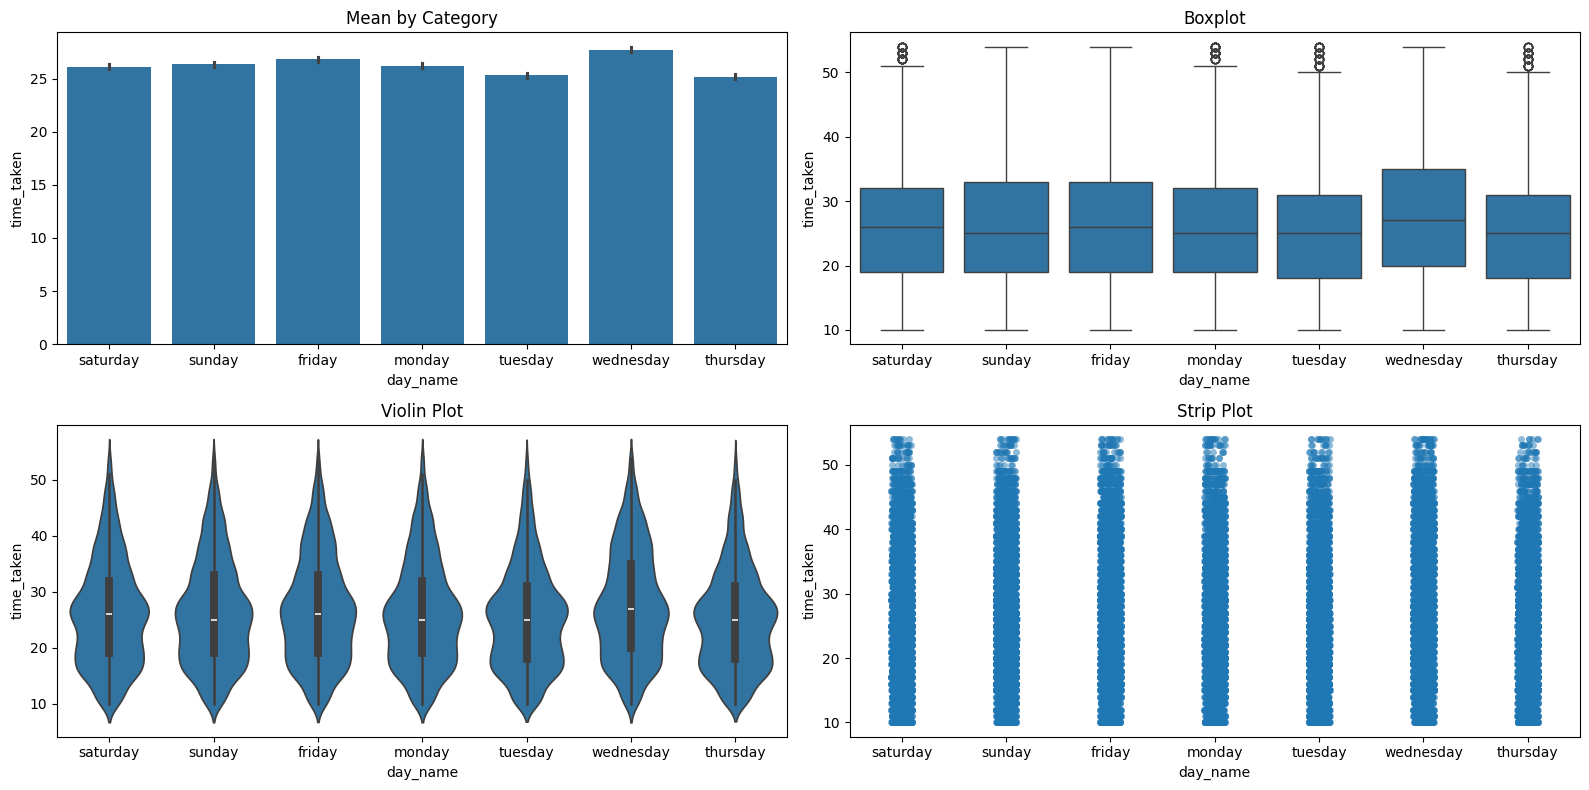

In [405]:
numerical_categorical_analysis(df, "day_name", "time_taken")

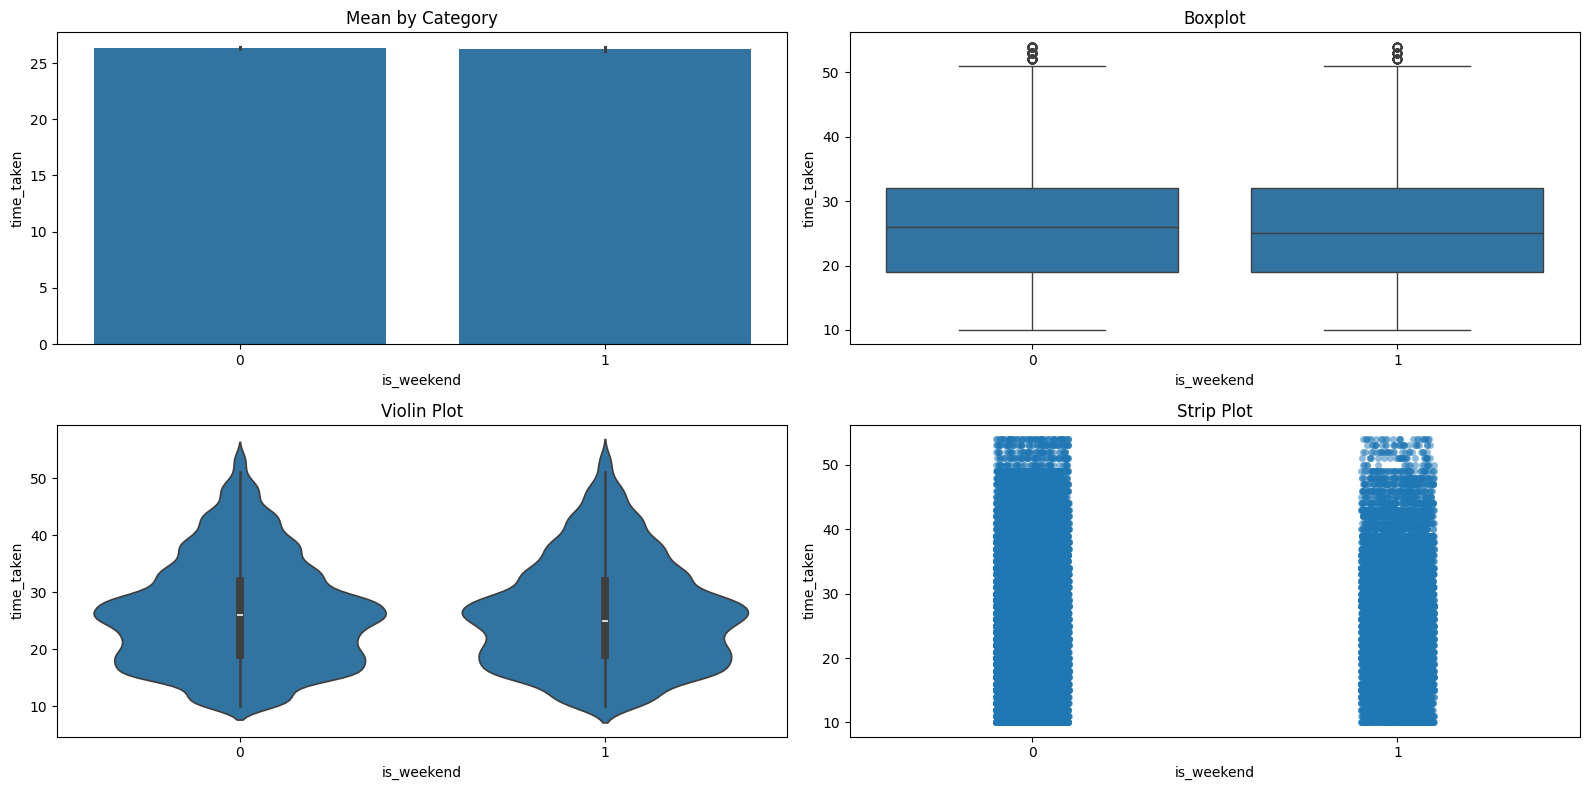

In [406]:
numerical_categorical_analysis(df, "is_weekend", "time_taken")

In [407]:
chi_square_test(df, "is_weekend", "traffic_density")

traffic_density  high   jam    low  medium
is_weekend                                
0                3145  9906  10820    7710
1                1147  3800   4155    2902

P-value: 0.53485
Fail to reject H0 → No significant association


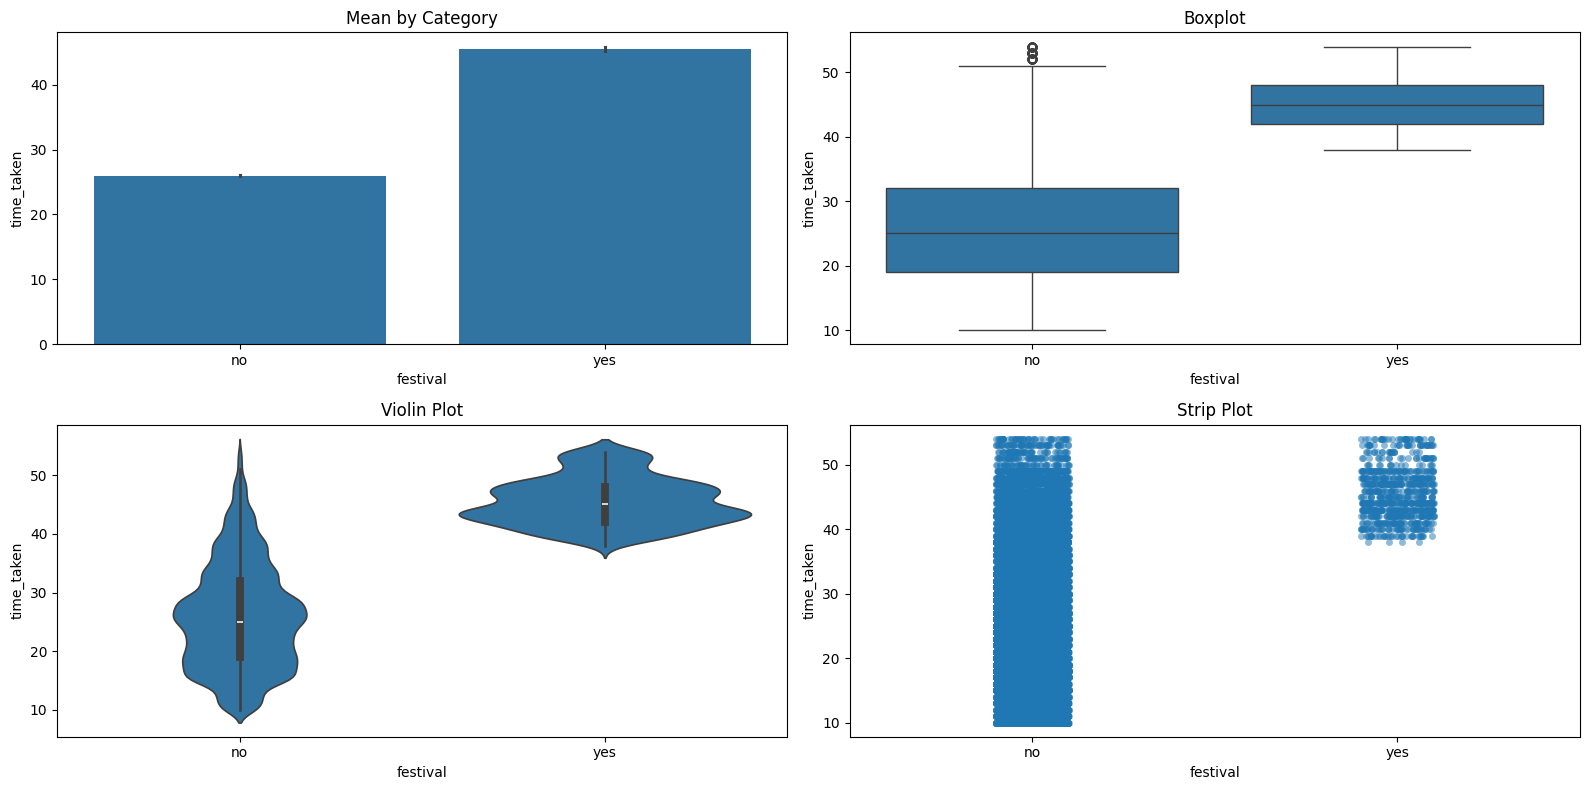

In [408]:
numerical_categorical_analysis(df, "festival","time_taken")

In [409]:
chi_square_test(df, "festival","traffic_density")

traffic_density  high    jam    low  medium
festival                                   
no               4206  13058  14802   10450
yes                69    611     48     124

P-value: 0.00000
Reject H0 → Significant association


In [410]:
df.pivot_table(index="traffic_density", columns="festival",values="time_taken",aggfunc="mean")

festival                no        yes
traffic_density                      
high             26.966001  45.826087
jam              30.500689  46.088380
low              21.306378  42.062500
medium           26.569761  43.701613

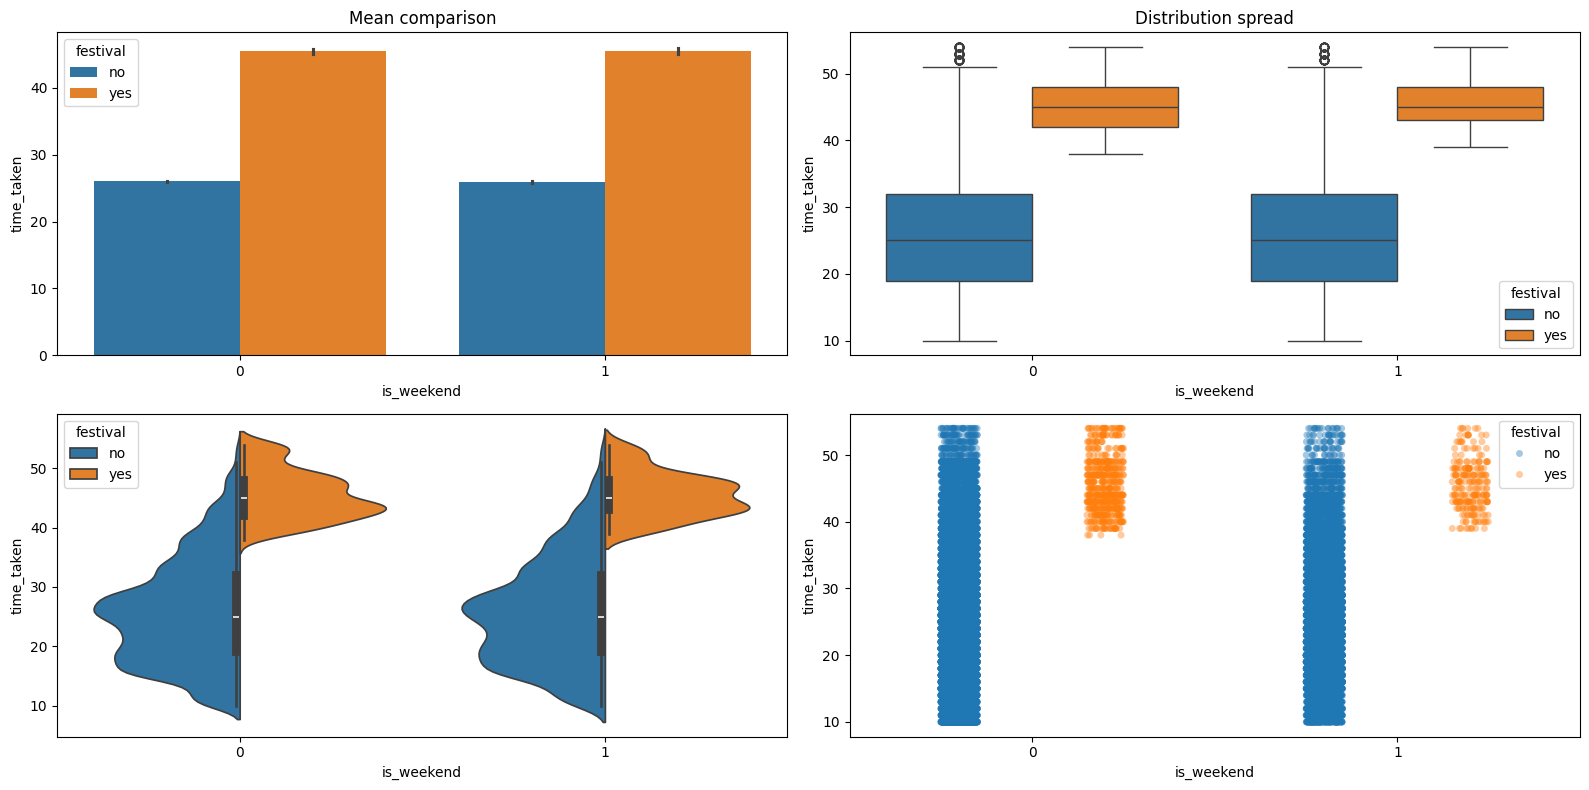

In [411]:
multivariate_analysis(df, "time_taken","is_weekend","festival")

## order_time

In [412]:
time_subset = df.loc[:,["order_hour","time_of_day","prep_time_minutes"]]
time_subset

order_hour     time_of_day  prep_time_minutes
0              21     dinner_peak               15.0
1              14       afternoon               10.0
2              17  evening_snacks               10.0
3               9       breakfast               10.0
4              19  evening_snacks               15.0
...           ...             ...                ...
43580          11      lunch_peak               10.0
43581          19  evening_snacks               15.0
43582          23      late_night               15.0
43583          13      lunch_peak                5.0
43584          17  evening_snacks                5.0

[43585 rows x 3 columns]

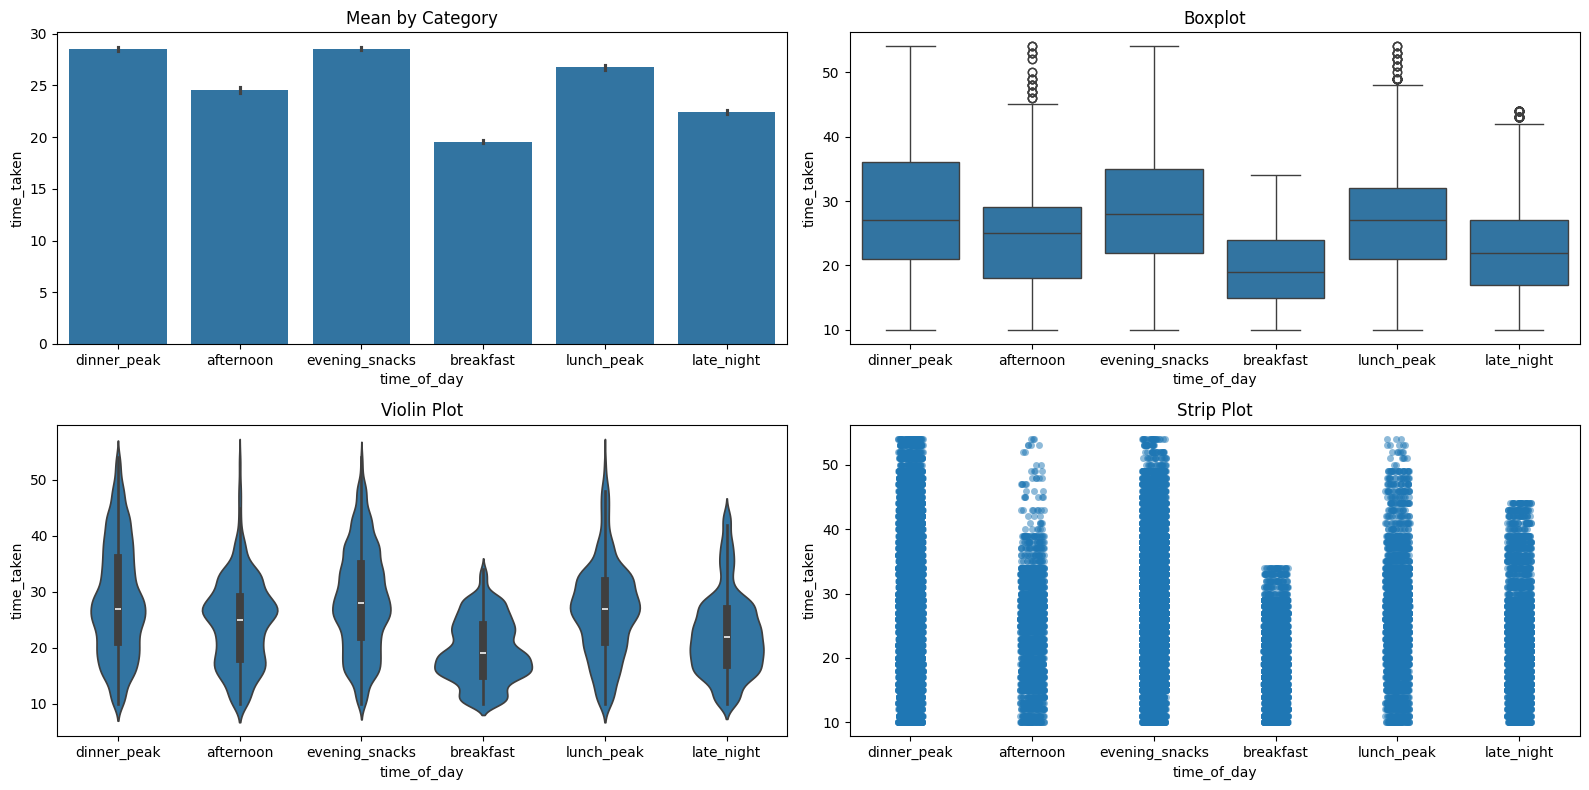

In [413]:
numerical_categorical_analysis(df, "time_of_day", "time_taken")

In [414]:
anova_test(df, "time_taken", "time_of_day")

P-value: 0.00000
Reject H0 → Significant difference between groups


In [415]:
df["order_hour"].value_counts().head(5)

order_hour
21    4659
19    4573
22    4550
20    4496
23    4489
Name: count, dtype: int64

count  percentage
order_hour                   
21           4659       10.69
19           4573       10.49
22           4550       10.44
20           4496       10.32
23           4489       10.30
18           4458       10.23
17           4240        9.73
10           1978        4.54
11           1949        4.47
9            1932        4.43
8            1806        4.14
12            887        2.04
15            871        2.00
14            785        1.80
13            777        1.78
16            706        1.62
0             429        0.98

Number of categories: 17
Categories: [21, 14, 17, 9, 19, 20, 22, 8, 12, 18, 23, 13, 11, 10, 16, 15, 0]


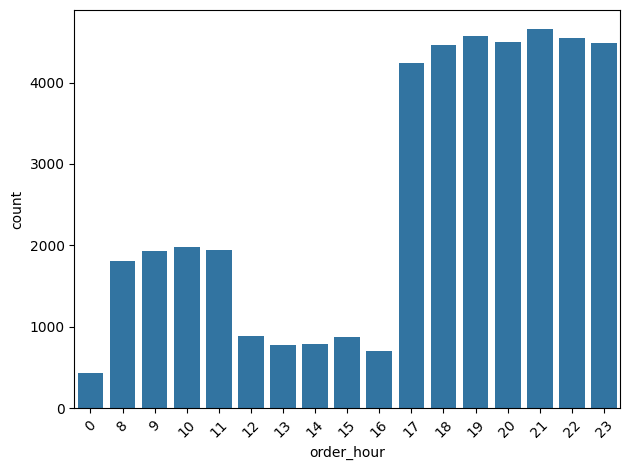

In [416]:
categorical_analysis(df, "order_hour")

count  percentage
time_of_day                      
dinner_peak     13705       31.44
evening_snacks  13271       30.45
breakfast        5716       13.11
late_night       4918       11.28
lunch_peak       3613        8.29
afternoon        2362        5.42

Number of categories: 6
Categories: ['dinner_peak', 'afternoon', 'evening_snacks', 'breakfast', 'lunch_peak', 'late_night']


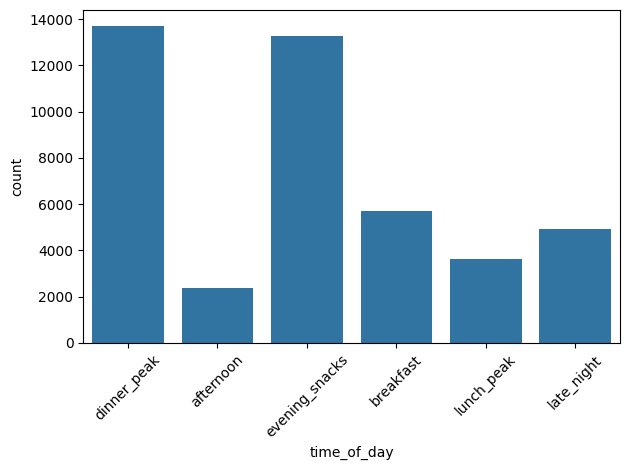

In [417]:
categorical_analysis(df,"time_of_day")

## prep_time_minutes

In [418]:
df["prep_time_minutes"].dtype

dtype('float64')

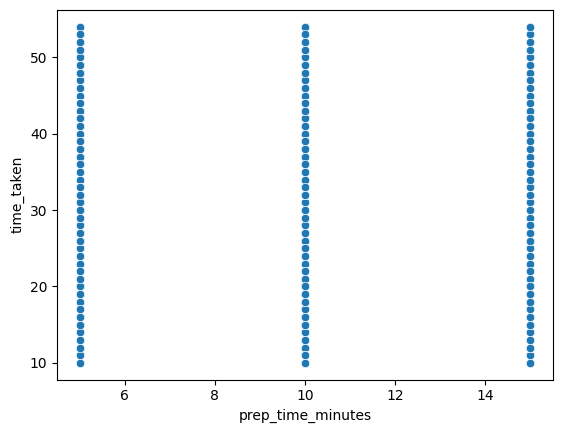

In [419]:
sns.scatterplot(df, x="prep_time_minutes",y="time_taken")
plt.show()

count  percentage
prep_time_minutes                   
5.0                14597       33.49
15.0               14517       33.31
10.0               14471       33.20

Number of categories: 3
Categories: [15.0, 10.0, 5.0]


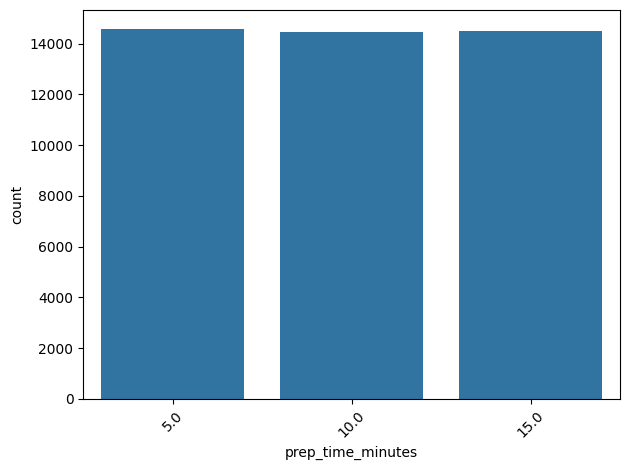

In [420]:
categorical_analysis(df, "prep_time_minutes")

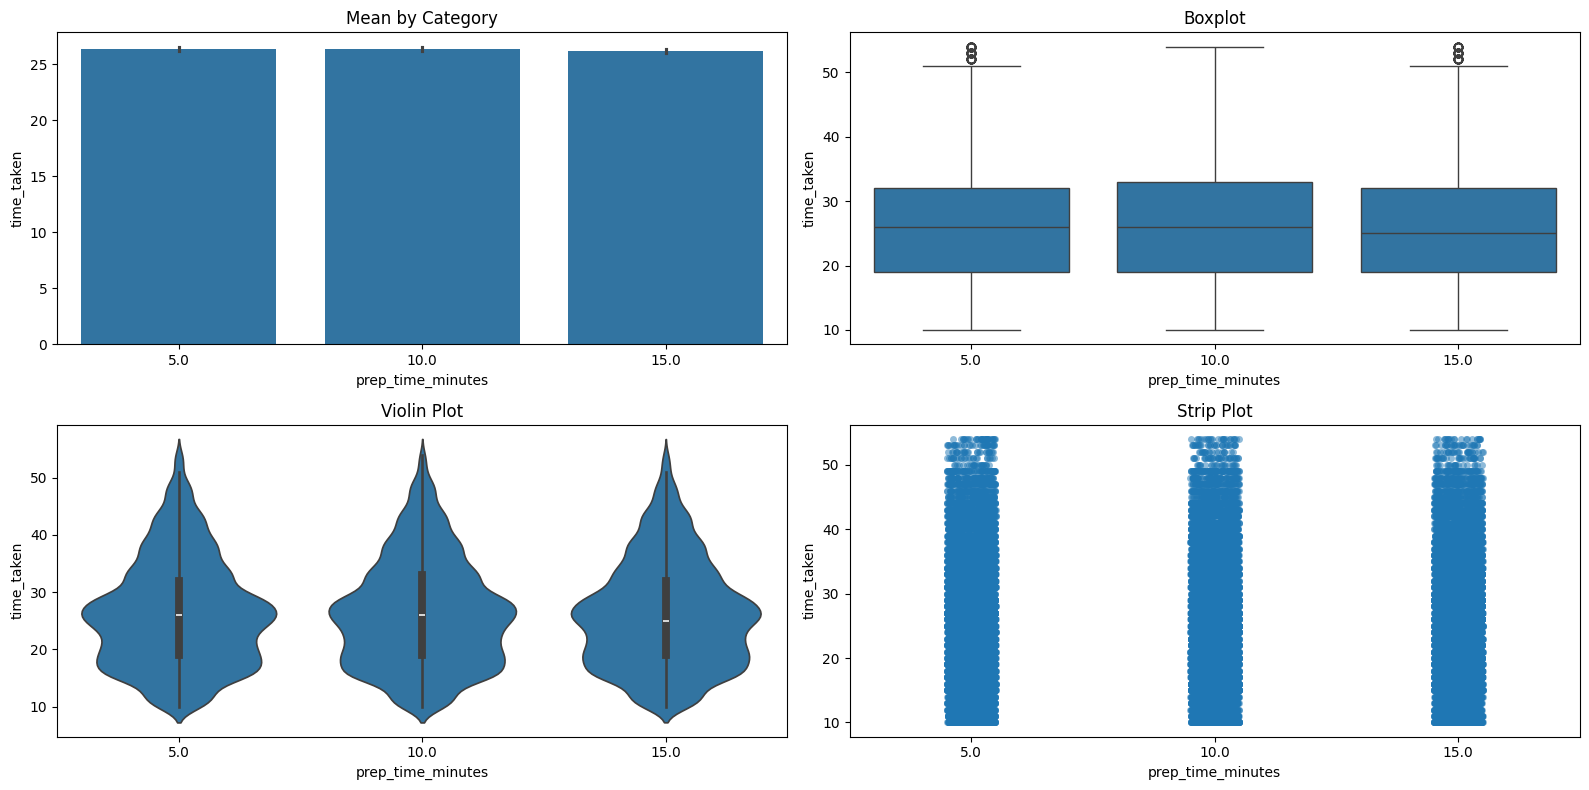

In [421]:
numerical_categorical_analysis(df, "prep_time_minutes", "time_taken")

In [422]:
anova_test(df, "time_taken", "prep_time_minutes")

P-value: 0.10393
Fail to reject H0 → No significant difference


## traffic_density

count  percentage
traffic_density                   
low              14975       34.36
jam              13706       31.45
medium           10612       24.35
high              4292        9.85

Number of categories: 4
Categories: ['jam', 'high', 'medium', 'low']


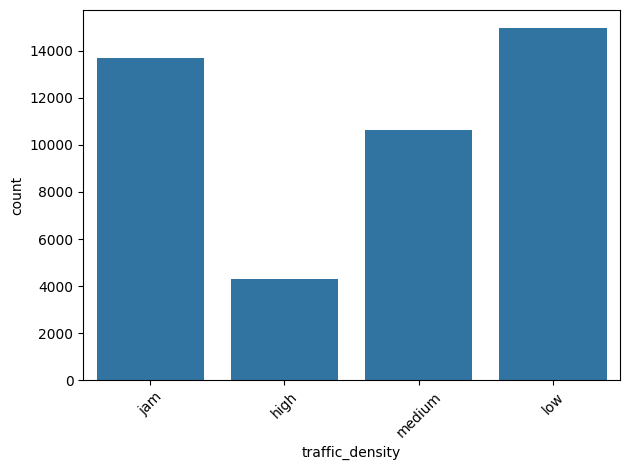

In [423]:
categorical_analysis(df,"traffic_density")

In [424]:
chi_square_test(df, "traffic_density", "city_type")

city_type        metropolitian  semi-urban  urban
traffic_density                                  
high                      3268          16    913
jam                      10746         126   2553
low                      10502           0   3965
medium                    8070          10   2281

P-value: 0.00000
Reject H0 → Significant association


In [425]:
chi_square_test(df, "traffic_density", "city_name")

city_name        agra  aurangabad  bangalore  bhopal  chennai  coimbatore  \
traffic_density                                                             
high               64          81        290      71      307         293   
jam               259         206        958     205      966         953   
low               247         228       1070     231     1011        1067   
medium            165         157        727     149      710         736   

city_name        dehradun  goa  hyderabad  indore  ...  kochi  kolkata  \
traffic_density                                    ...                   
high                   71   67        324     299  ...     66       64   
jam                   226  200        934     944  ...    217      212   
low                   235  233       1017    1051  ...    241      217   
medium                166  176        768     734  ...    153      173   

city_name        ludhiana  mumbai  mysore  prayagraj  pune  ranchi  surat  \
traffic_density                                                             
high                   62     312     304         69   295     313    302   
jam                   258     900     936        219   935     948    964   
low                   239    1079    1027        216  1027    1045   1065   
medium                170     746     763        196   731     776    715   

city_name        vadodara  
traffic_density            
high                  291  
jam                   963  
low                  1074  
medium                692  

[4 rows x 22 columns]

P-value: 0.57251
Fail to reject H0 → No significant association


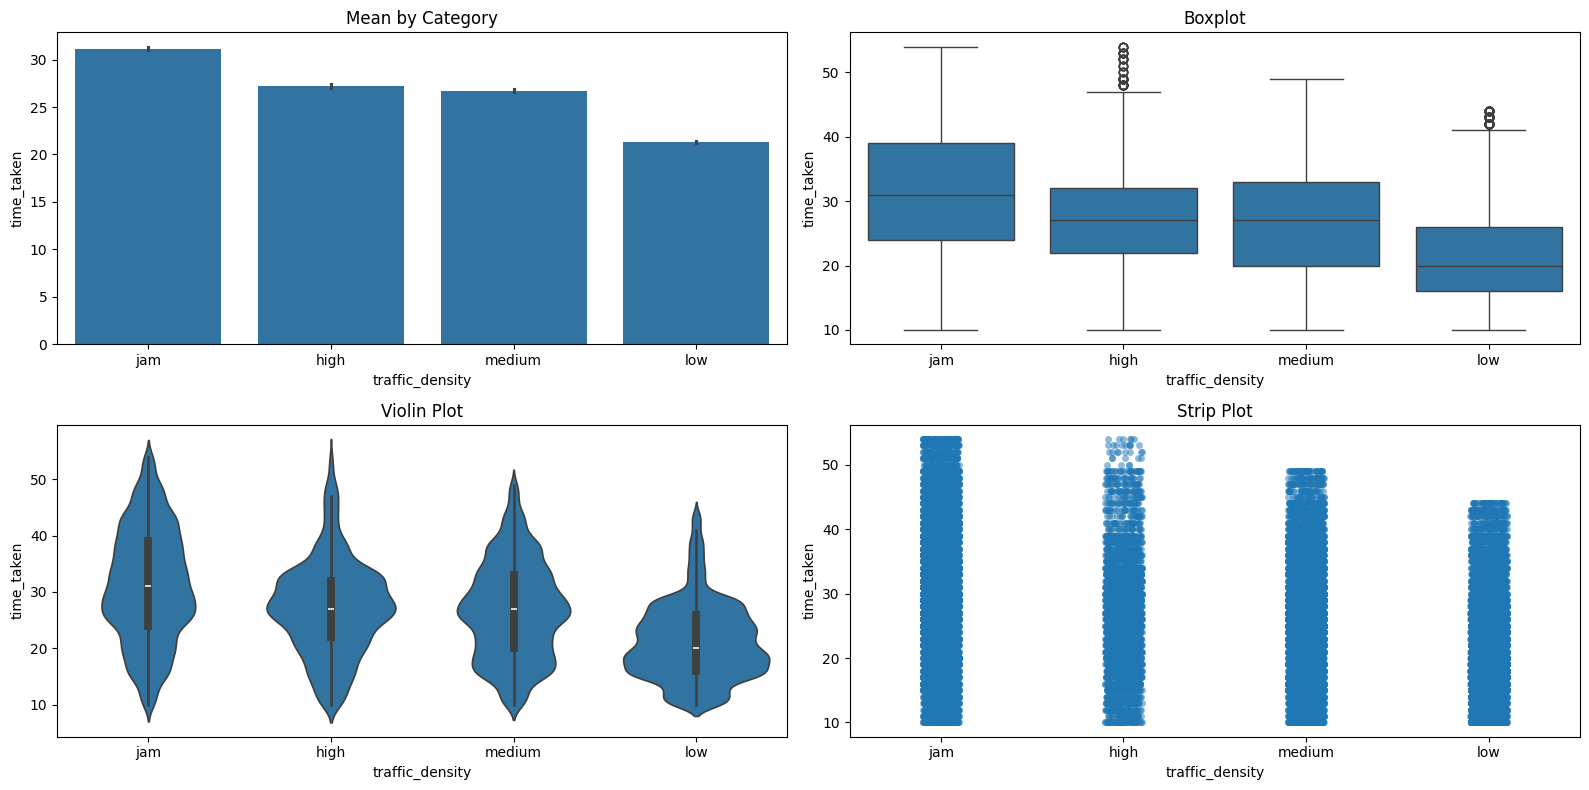

In [426]:
numerical_categorical_analysis(df, "traffic_density","time_taken")

In [427]:
anova_test(df, "time_taken","traffic_density")

P-value: 0.00000
Reject H0 → Significant difference between groups


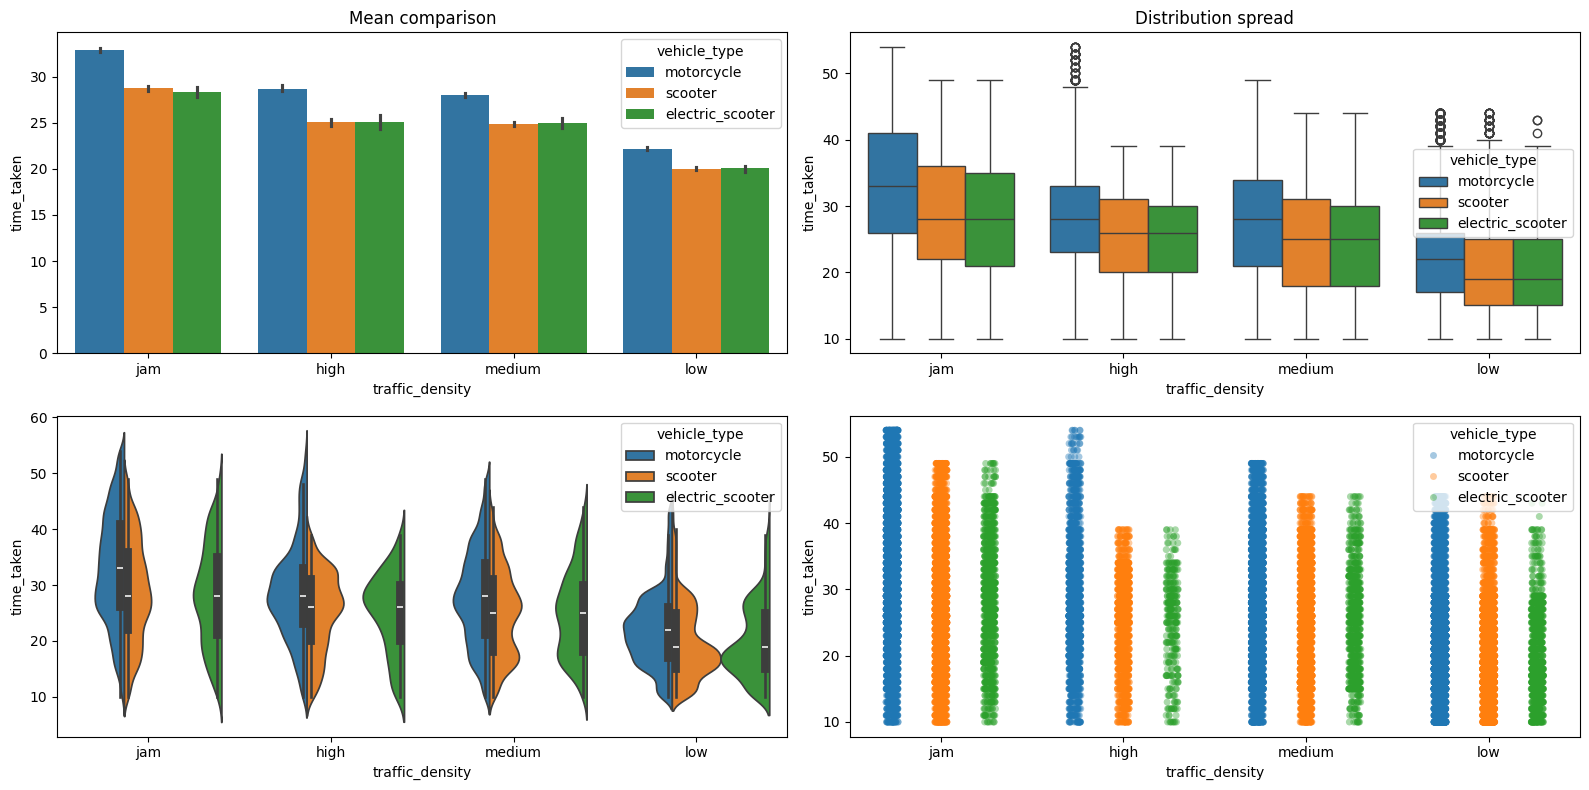

In [428]:
multivariate_analysis(df,"time_taken","traffic_density","vehicle_type")

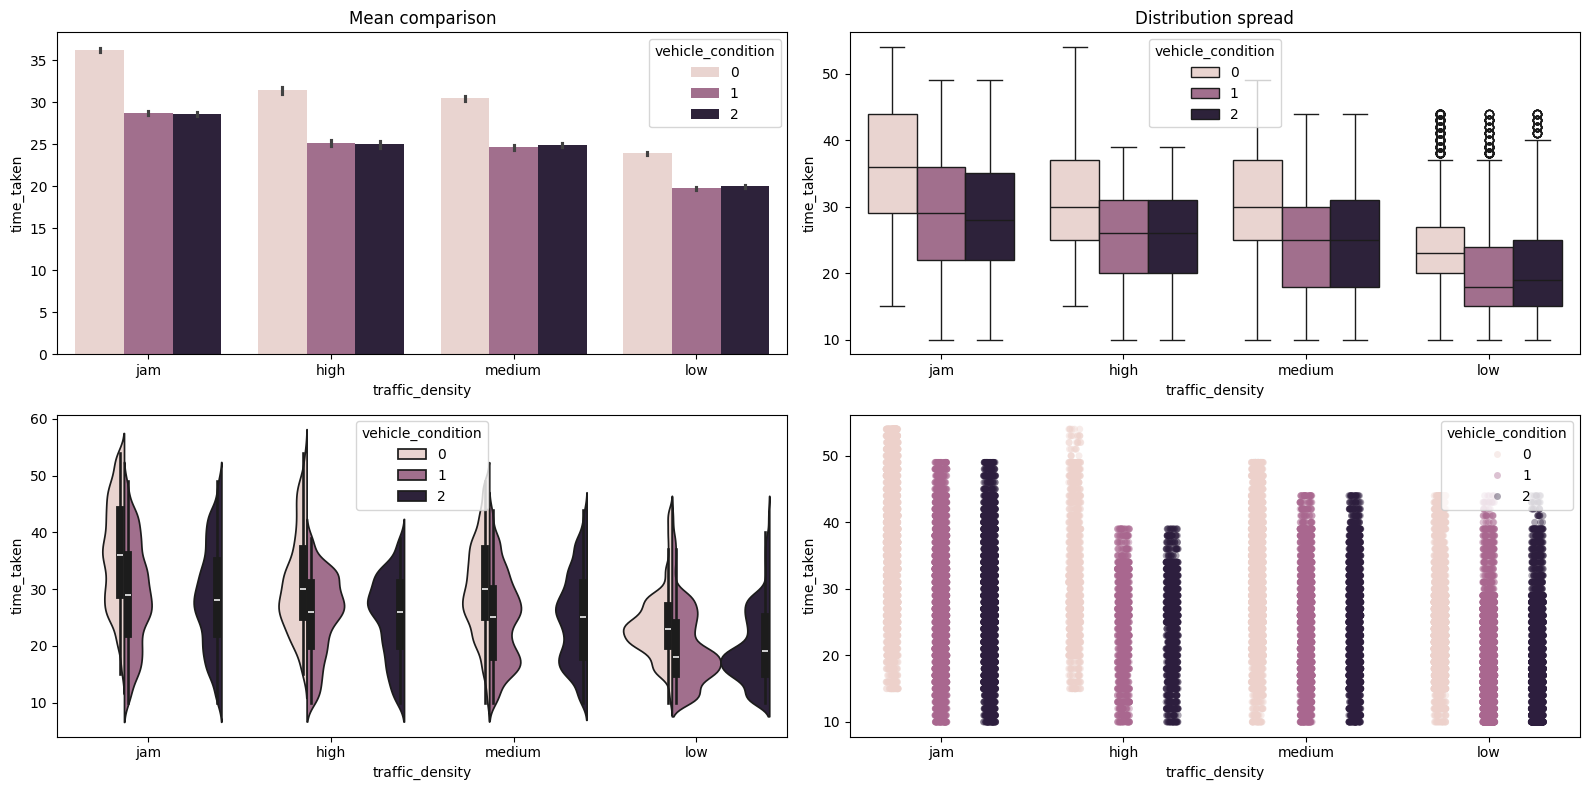

In [429]:
multivariate_analysis(df, "time_taken","traffic_density","vehicle_condition")

Traffic density is the dominant factor influencing delivery time across all vehicle types and conditions.

Deliveries during traffic jams take the longest, while low traffic leads to the shortest delivery times.

Vehicle type and condition have secondary effects, with motorcycles generally performing better in congested conditions.

Differences between vehicles reduce under low traffic, indicating road conditions matter more than vehicle choice.

Higher delivery times for better-condition vehicles reflect assignment bias, not slower performance.

Extreme delays are driven primarily by traffic congestion, not vehicle characteristics.

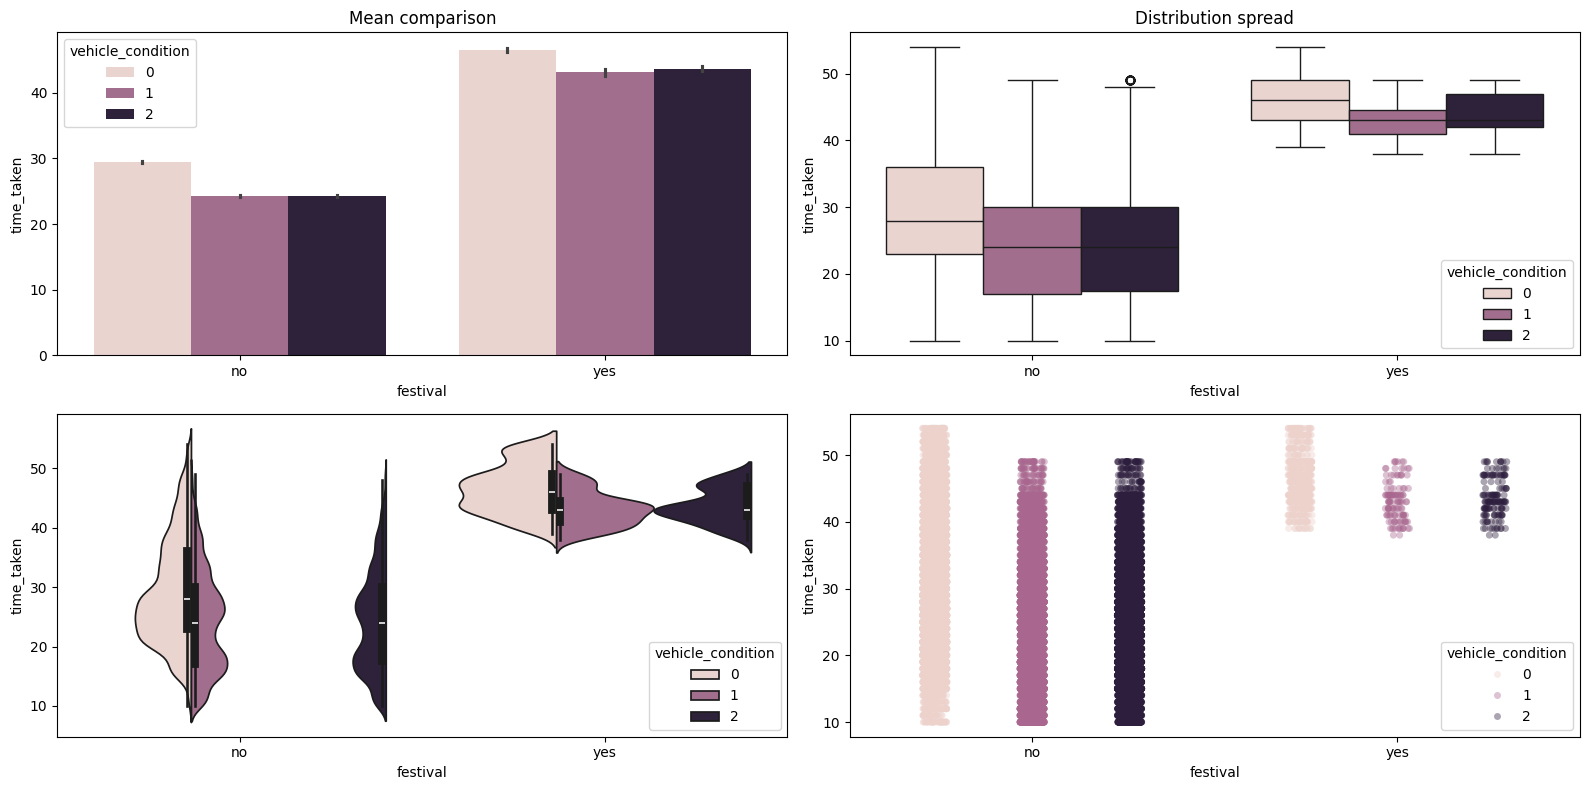

In [430]:
multivariate_analysis(df,"time_taken","festival","vehicle_condition")

Festival days have significantly higher delivery times across all vehicle conditions.

Differences between vehicle conditions are minor compared to the festival effect.

Delivery time distributions are more spread and right-shifted during festivals, indicating higher delays.

Slightly higher averages for better-condition vehicles likely reflect assignment bias, not slower vehicles.

Festival-related demand and congestion dominate delivery time behavior.

## multiple_deliveries

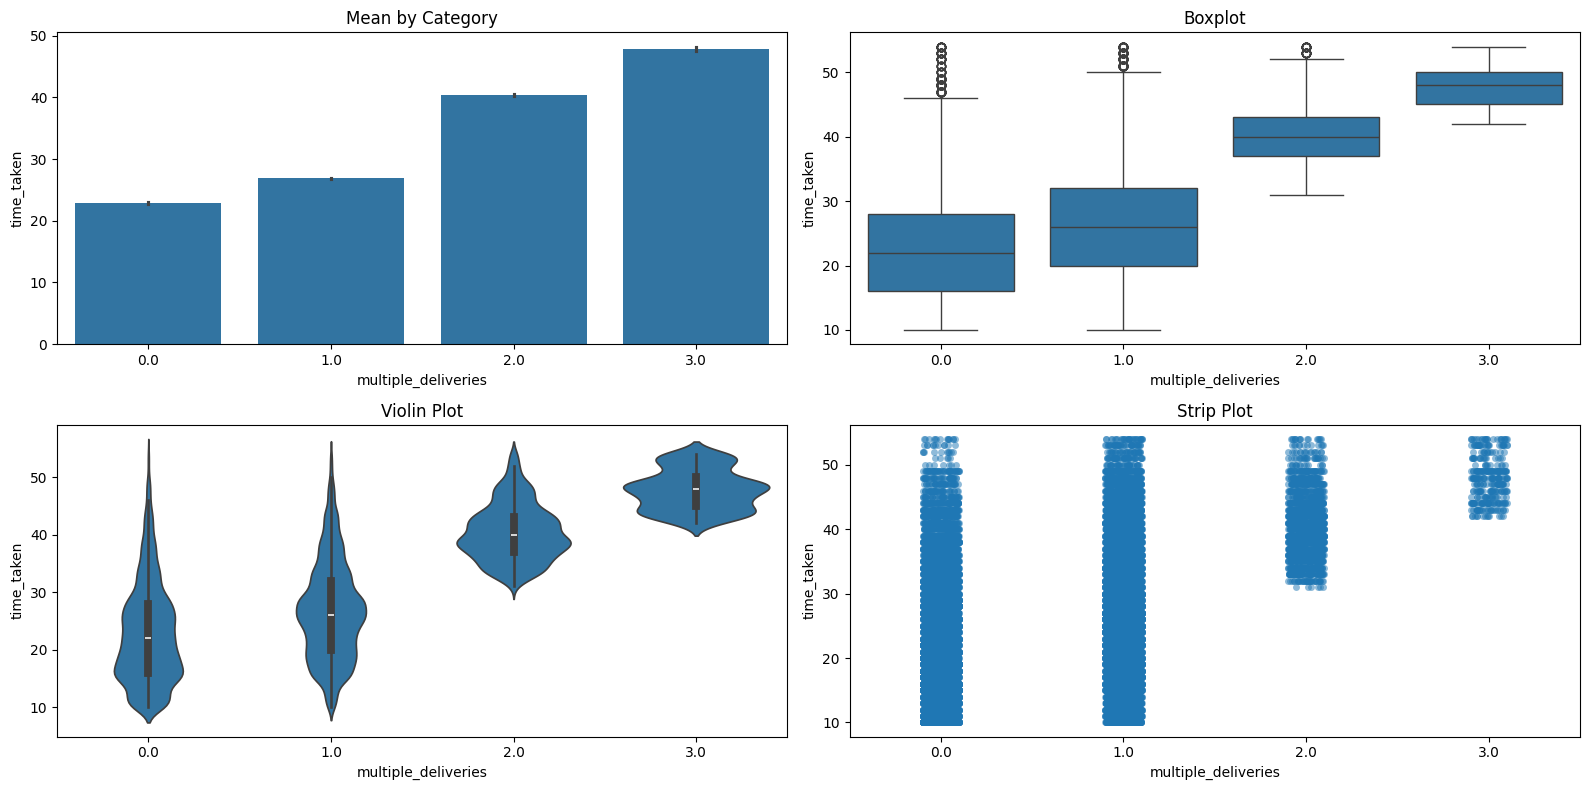

In [431]:
numerical_categorical_analysis(df, "multiple_deliveries","time_taken")

In [432]:
anova_test(df, "time_taken","multiple_deliveries")

P-value: 0.00000
Reject H0 → Significant difference between groups


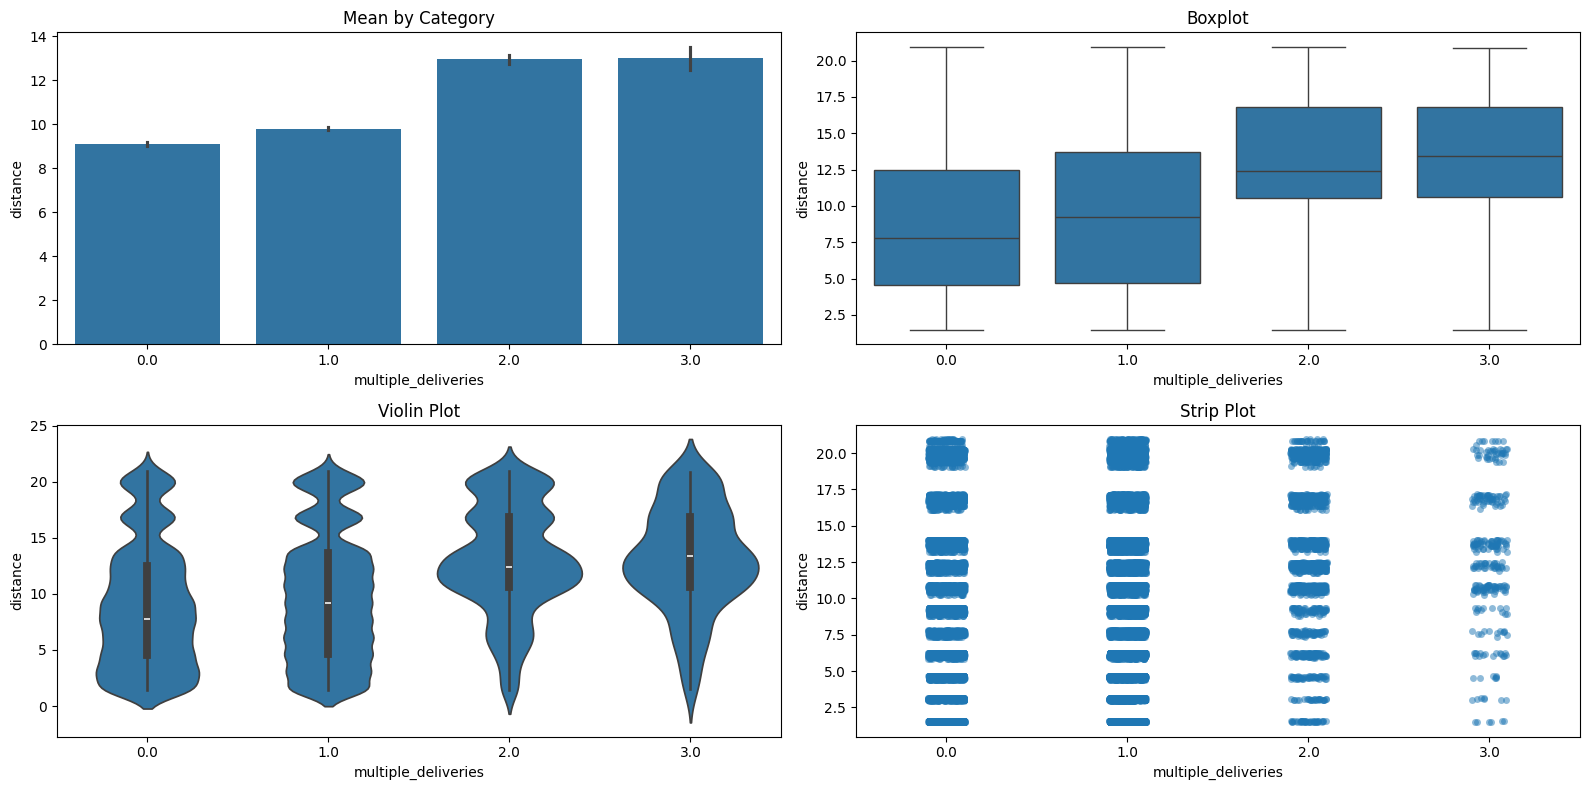

In [433]:
numerical_categorical_analysis(df, "multiple_deliveries","distance")

## weather

count  percentage
weather                      
fog          7434       17.06
stormy       7364       16.90
cloudy       7274       16.69
sandstorms   7237       16.60
windy        7211       16.54
sunny        7065       16.21

Number of categories: 6
Categories: ['fog', 'stormy', 'sandstorms', 'windy', 'cloudy', 'sunny']


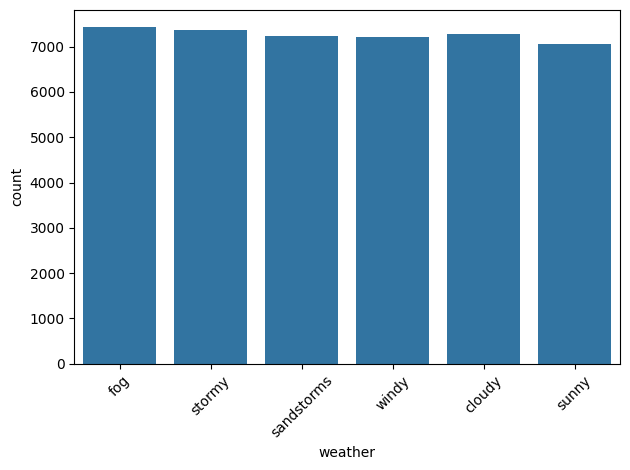

In [434]:
categorical_analysis(df, "weather")

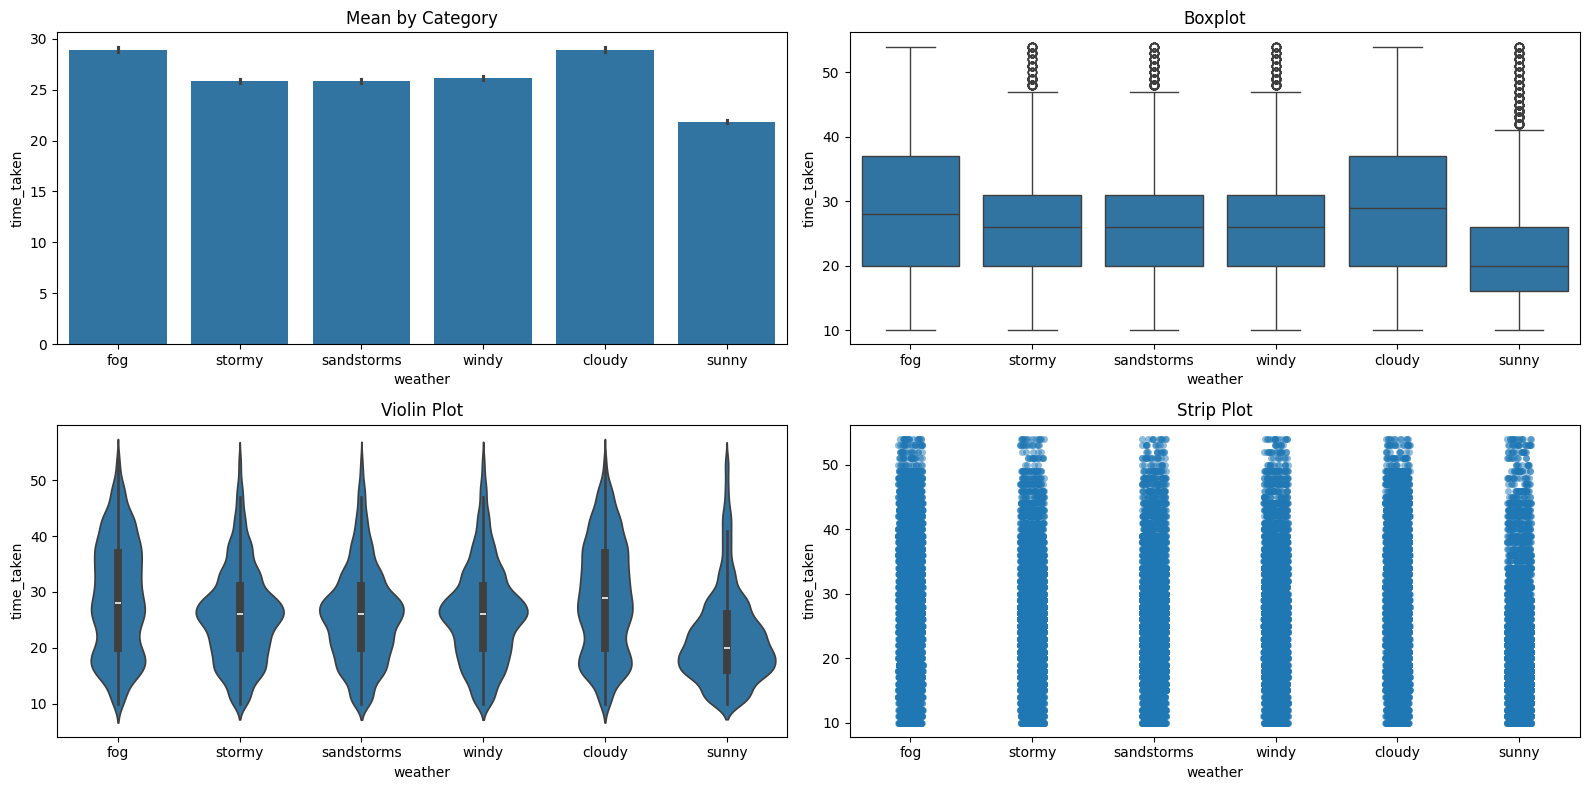

In [435]:
numerical_categorical_analysis(df, "weather","time_taken")

In [436]:
anova_test(df, "time_taken","weather")

P-value: 0.00000
Reject H0 → Significant difference between groups


In [437]:
chi_square_test(df,"weather","traffic_density")

traffic_density  high   jam   low  medium
weather                                  
cloudy            715  2260  2521    1778
fog               757  2363  2517    1797
sandstorms        678  2315  2516    1728
stormy            713  2256  2613    1782
sunny             714  2230  2397    1724
windy             715  2282  2411    1803

P-value: 0.50380
Fail to reject H0 → No significant association


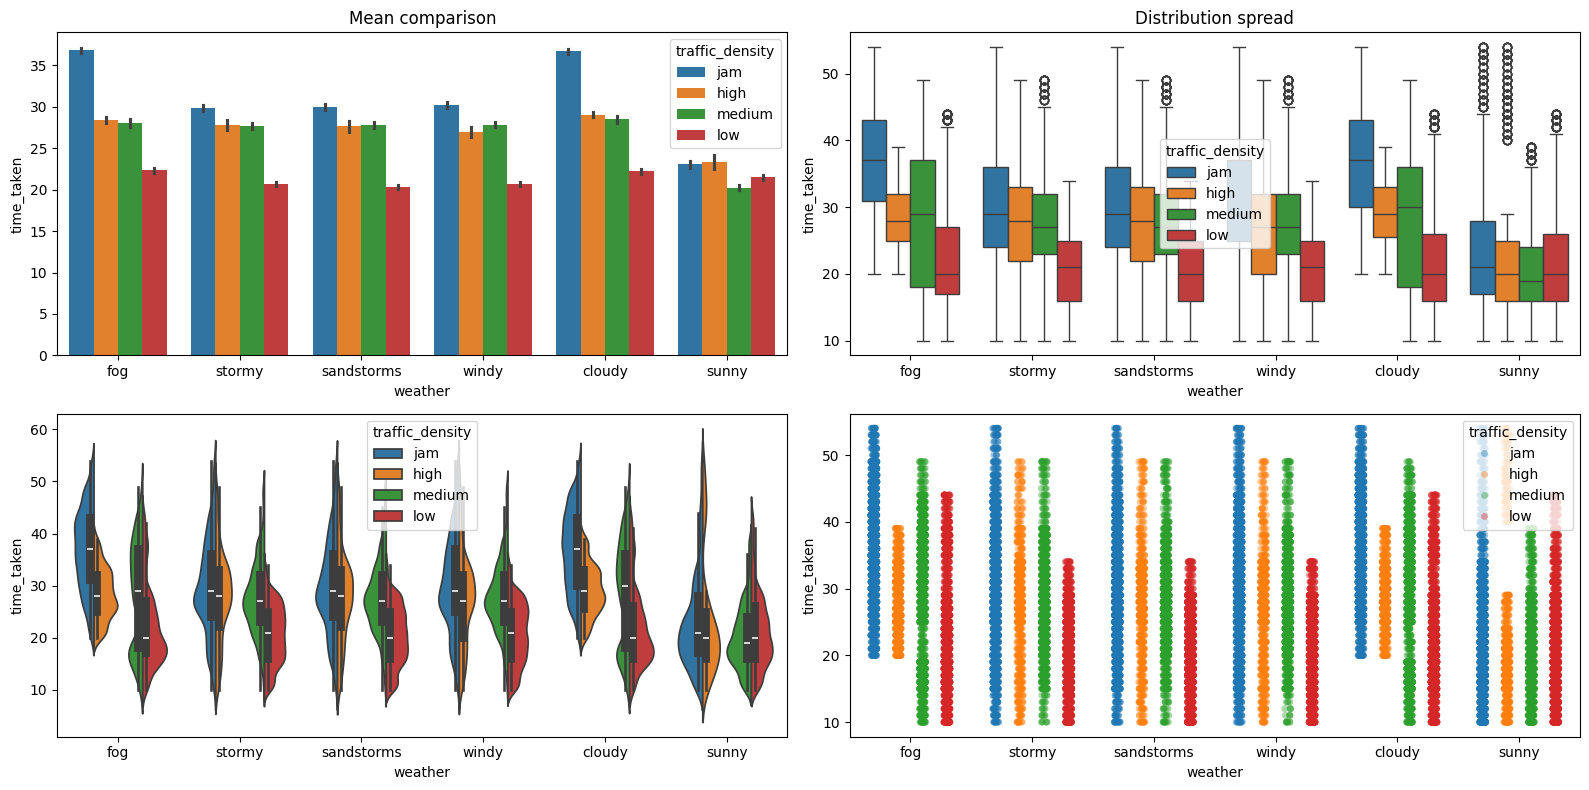

In [438]:
multivariate_analysis(df, "time_taken","weather","traffic_density")

Traffic density is the dominant driver of delivery time across all weather conditions.

Adverse weather slightly increases delivery time, mainly when combined with high or jam traffic.

Weather impact is minimal under low traffic, indicating interaction effects rather than direct causality.

In [439]:
df.pivot_table(index="weather",columns="traffic_density",values="time_taken",aggfunc="mean")

traffic_density       high        jam        low     medium
weather                                                    
cloudy           29.055944  36.693805  22.237604  28.476378
fog              28.425363  36.805755  22.323004  28.061213
sandstorms       27.620944  29.962851  20.337838  27.788194
stormy           27.793829  29.830674  20.682740  27.686869
sunny            23.315126  23.038117  21.481435  20.227958
windy            26.976224  30.200701  20.668187  27.851359

## vehicle_condition , vehicle_type

count  percentage
vehicle_condition                   
2                  14549       33.38
0                  14523       33.32
1                  14513       33.30

Number of categories: 3
Categories: [2, 1, 0]


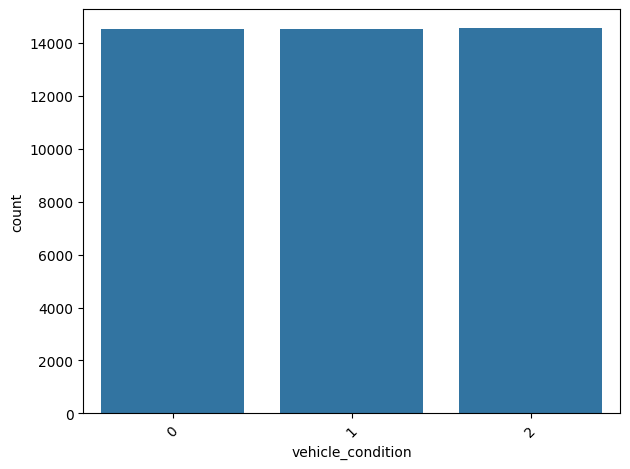

In [440]:
categorical_analysis(df, "vehicle_condition")

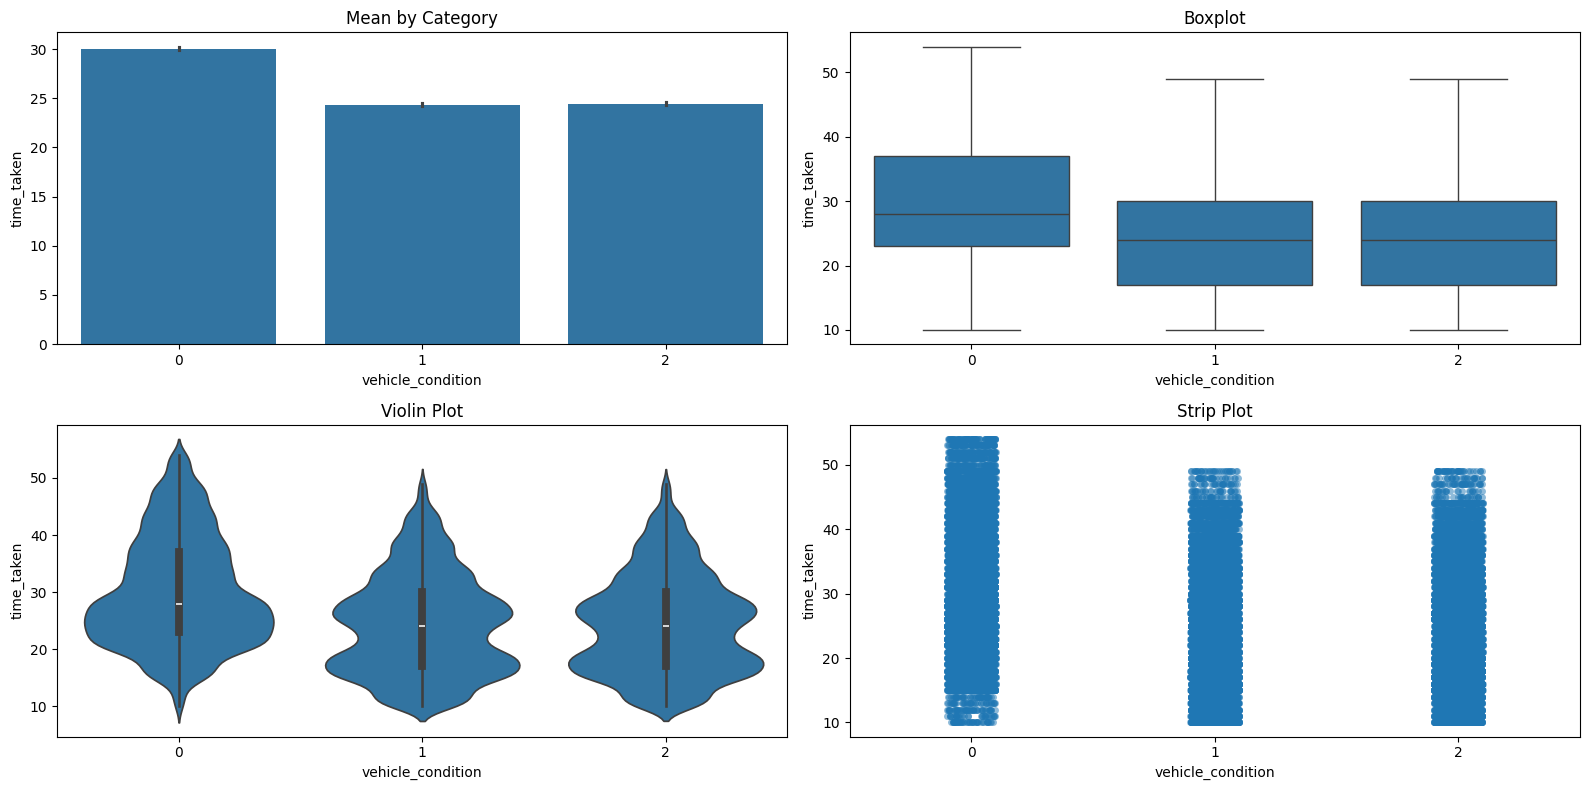

In [441]:
numerical_categorical_analysis(df, "vehicle_condition", "time_taken")

In [442]:
anova_test(df, "time_taken","vehicle_condition")

P-value: 0.00000
Reject H0 → Significant difference between groups


count  percentage
vehicle_type                       
motorcycle        25480       58.46
scooter           14587       33.47
electric_scooter   3518        8.07

Number of categories: 3
Categories: ['motorcycle', 'scooter', 'electric_scooter']


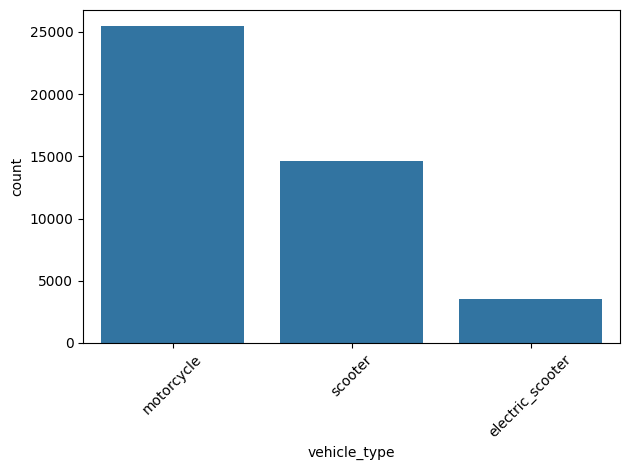

In [443]:
categorical_analysis(df,"vehicle_type")

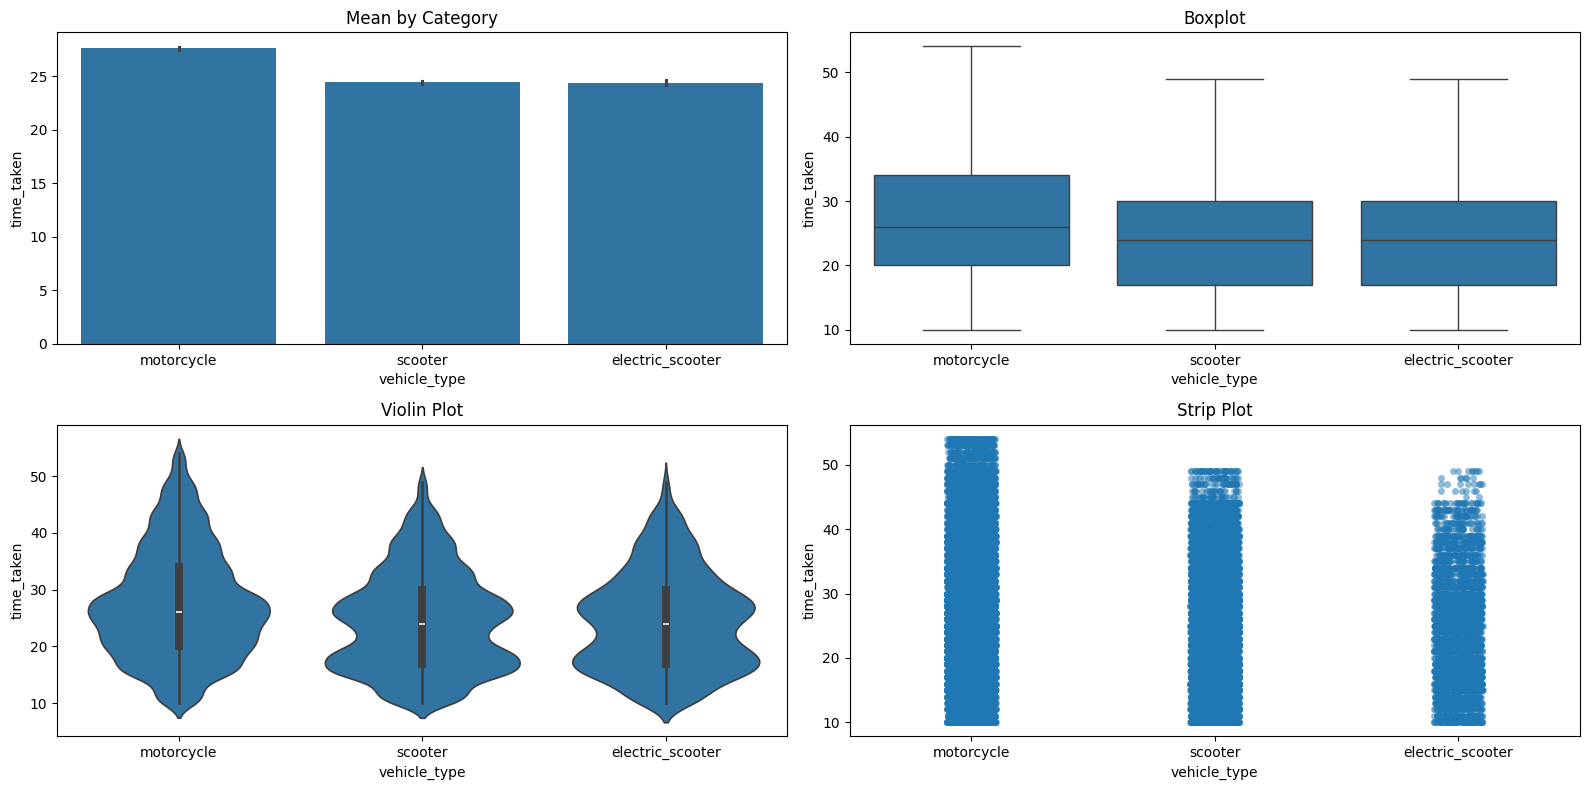

In [444]:
numerical_categorical_analysis(df,"vehicle_type","time_taken")

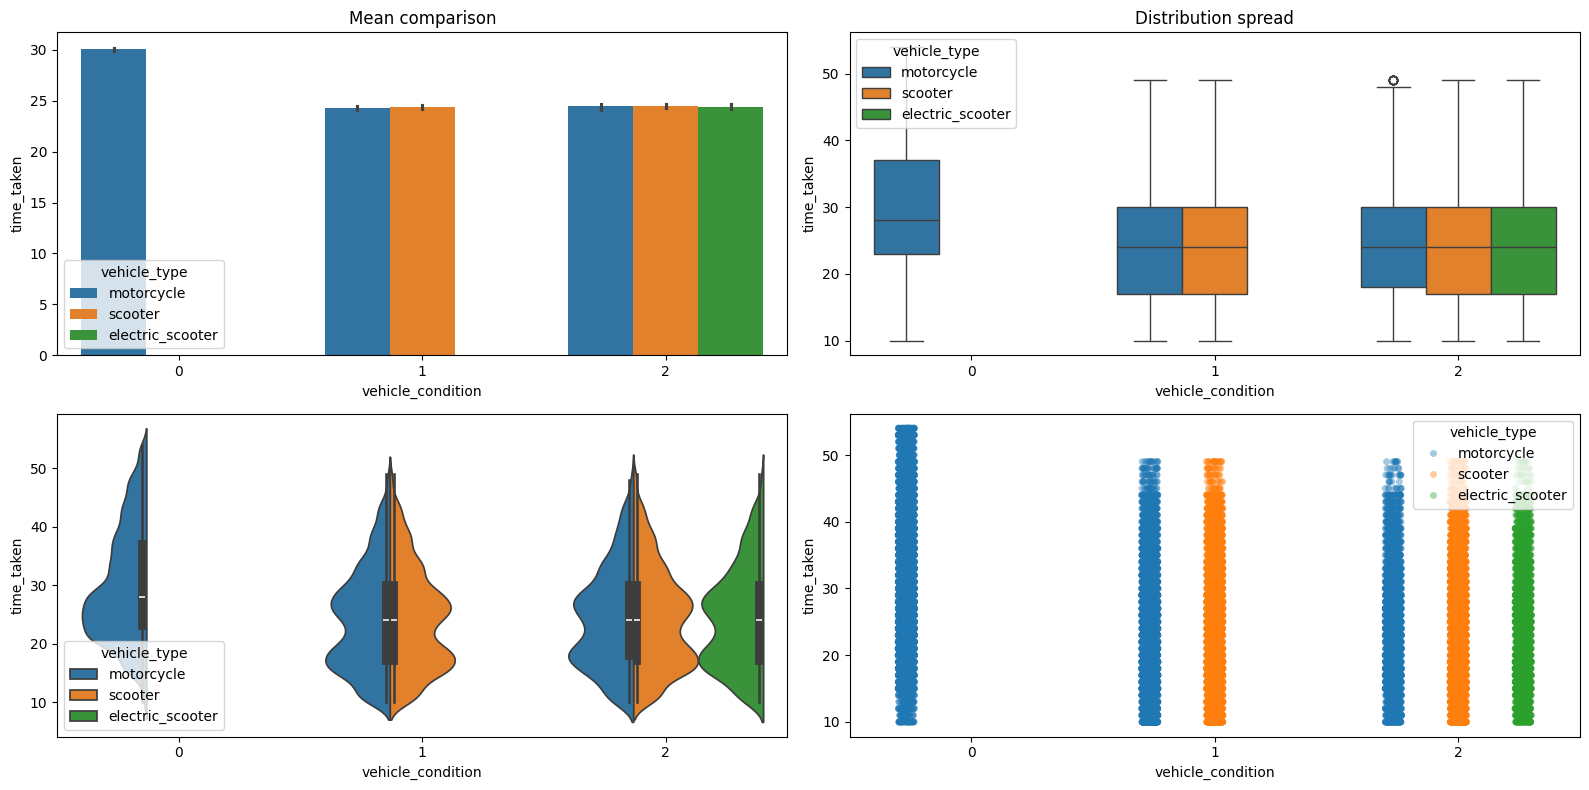

In [445]:
multivariate_analysis(df, "time_taken","vehicle_condition","vehicle_type")

In [446]:
chi_square_test(df, "vehicle_type","vehicle_condition")

vehicle_condition      0     1     2
vehicle_type                        
electric_scooter       0     0  3518
motorcycle         14523  7324  3633
scooter                0  7189  7398

P-value: 0.00000
Reject H0 → Significant association


## order_type

count  percentage
order_type                   
snack       11017       25.28
meal        10946       25.11
drinks      10832       24.85
buffet      10790       24.76

Number of categories: 4
Categories: ['snack', 'meal', 'drinks', 'buffet']


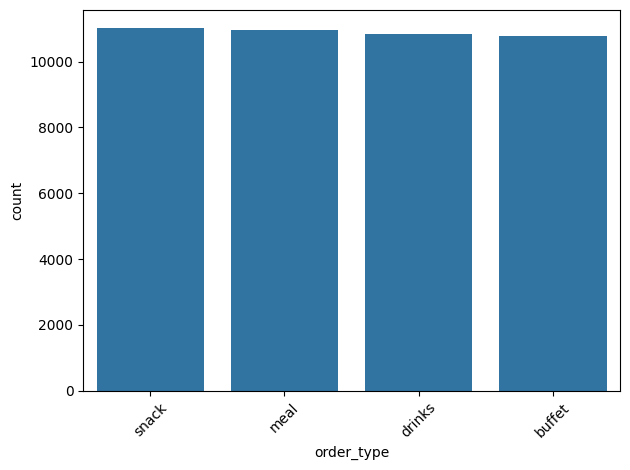

In [447]:
categorical_analysis(df, "order_type")

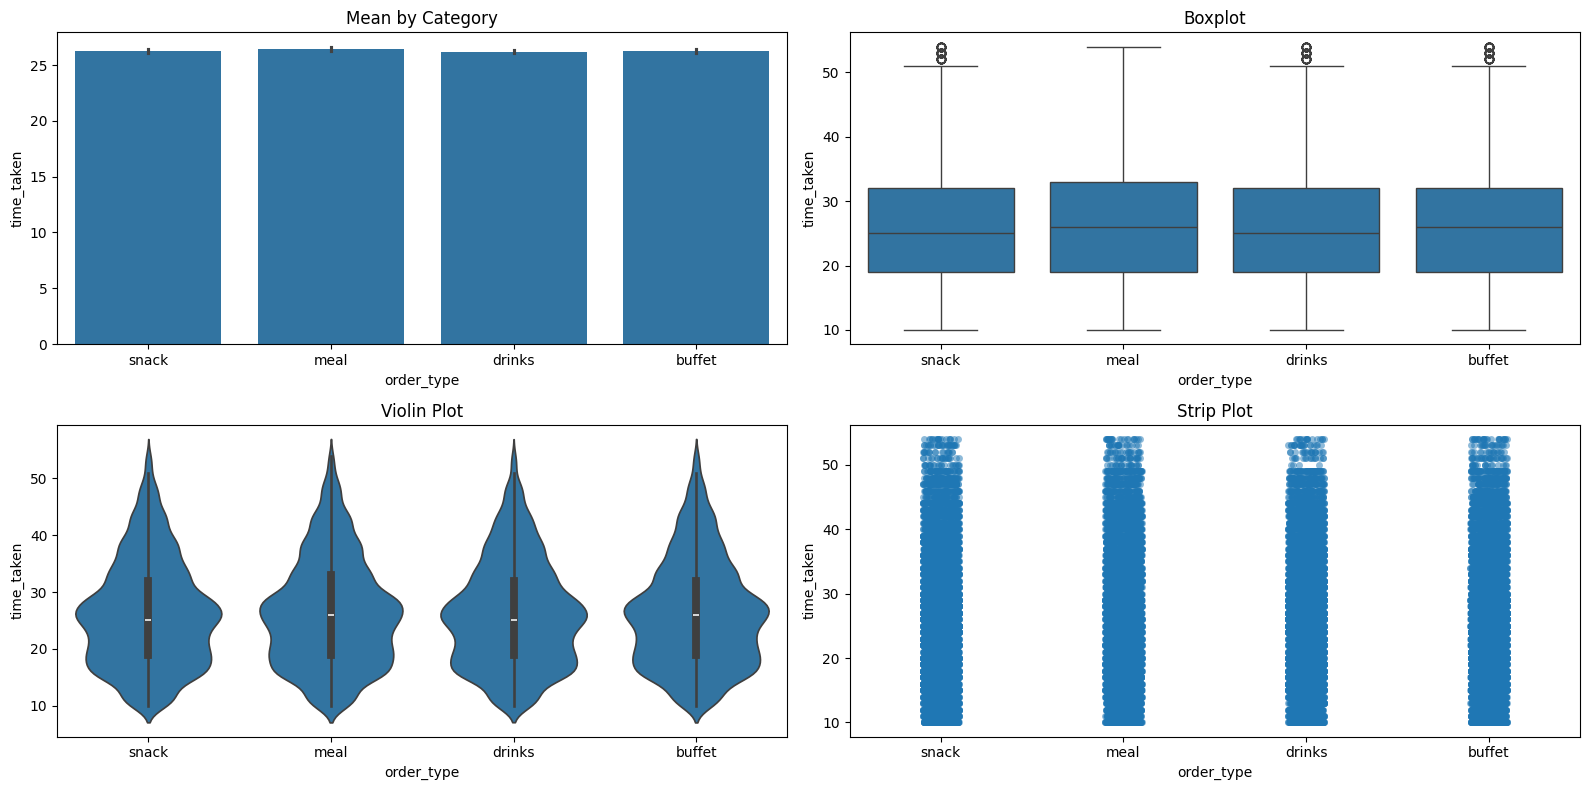

In [448]:
numerical_categorical_analysis(df, "order_type","time_taken")

In [449]:
anova_test(df, "time_taken","order_type")

P-value: 0.36765
Fail to reject H0 → No significant difference


In [450]:
pd.crosstab(df["order_type"],df["is_weekend"])

is_weekend     0     1
order_type            
buffet      7908  2882
drinks      7771  3061
meal        7934  3012
snack       7968  3049

In [451]:
chi_square_test(df,"prep_time_minutes","order_type")

order_type         buffet  drinks  meal  snack
prep_time_minutes                             
5.0                  3610    3639  3692   3656
10.0                 3512    3644  3647   3668
15.0                 3668    3549  3607   3693

P-value: 0.46064
Fail to reject H0 → No significant association


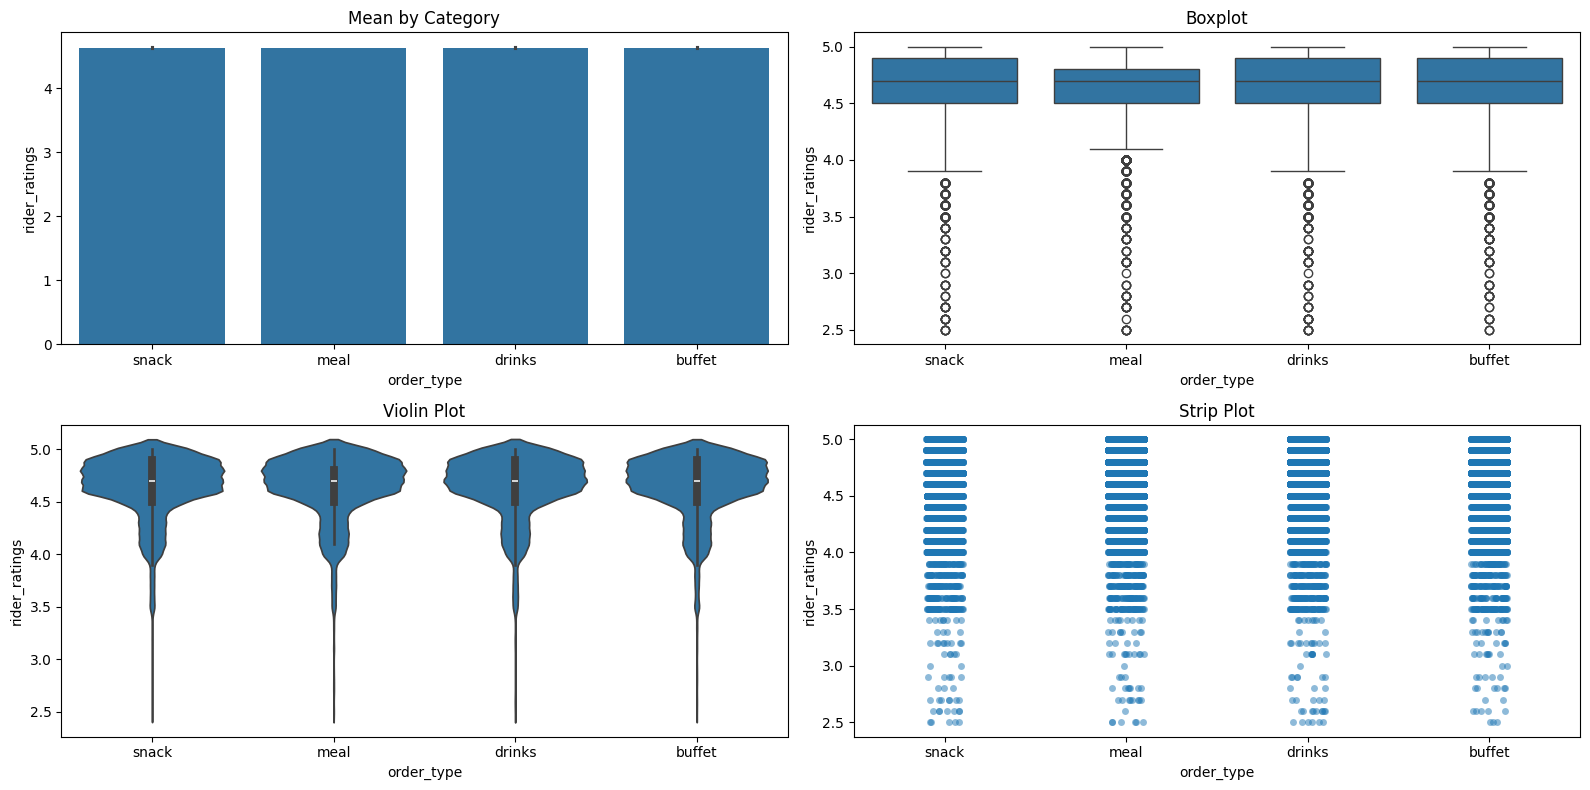

In [452]:
numerical_categorical_analysis(df, "order_type","rider_ratings")

In [453]:
chi_square_test(df,"is_weekend","order_type")

order_type  buffet  drinks  meal  snack
is_weekend                             
0             7908    7771  7934   7968
1             2882    3061  3012   3049

P-value: 0.08450
Fail to reject H0 → No significant association


In [454]:
chi_square_test(df,"festival","order_type")

order_type  buffet  drinks   meal  snack
festival                                
no           10530   10562  10691  10733
yes            204     209    204    235

P-value: 0.46691
Fail to reject H0 → No significant association


## city_name

count  percentage
city_name                    
jaipur       3307        7.59
ranchi       3082        7.07
coimbatore   3049        7.00
surat        3046        6.99
bangalore    3045        6.99
hyderabad    3043        6.98
mumbai       3037        6.97
mysore       3030        6.95
indore       3028        6.95
vadodara     3020        6.93
chennai      2994        6.87
pune         2988        6.86
agra          735        1.69
ludhiana      729        1.67
kanpur        707        1.62
prayagraj     700        1.61
dehradun      698        1.60
kochi         677        1.55
goa           676        1.55
aurangabad    672        1.54
kolkata       666        1.53
bhopal        656        1.51

Number of categories: 22
Categories: ['dehradun', 'kochi', 'pune', 'ludhiana', 'kanpur', 'mumbai', 'mysore', 'hyderabad', 'kolkata', 'ranchi', 'coimbatore', 'chennai', 'jaipur', 'surat', 'bangalore', 'goa', 'aurangabad', 'agra', 'vadodara', 'prayagraj', 'bhopal', 'indore']


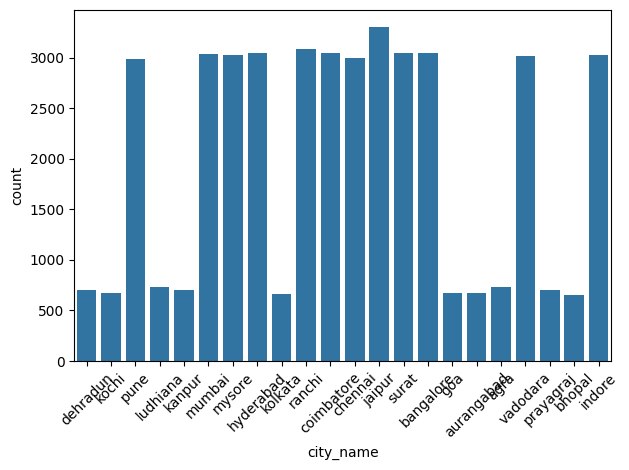

In [455]:
categorical_analysis(df,"city_name")

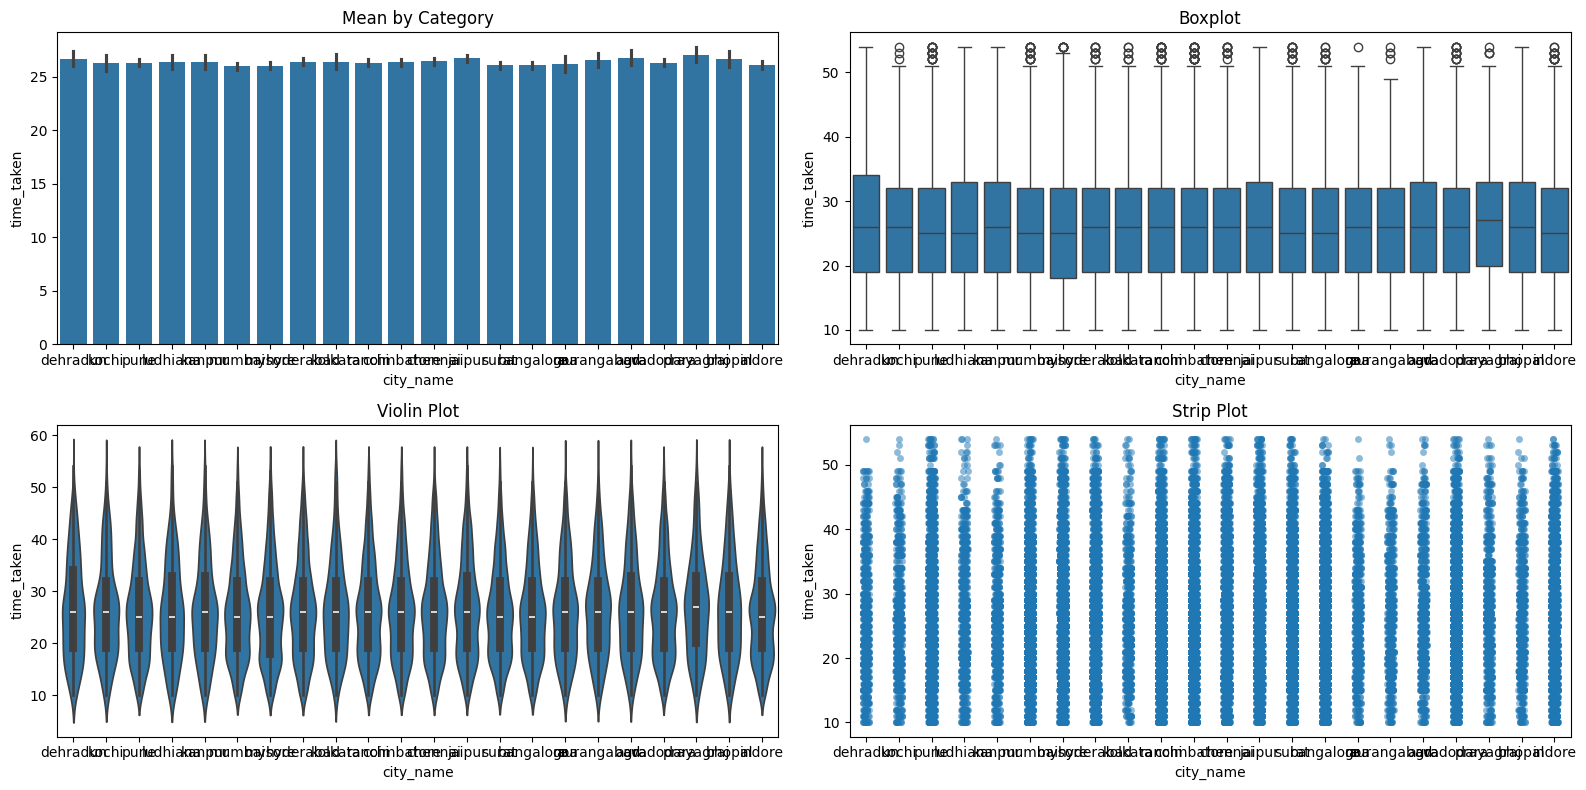

In [456]:
numerical_categorical_analysis(df,"city_name","time_taken")

count  percentage
city_type                       
metropolitian  32586       76.76
urban           9712       22.88
semi-urban       152        0.36

Number of categories: 3
Categories: ['metropolitian', 'urban', 'semi-urban', nan]


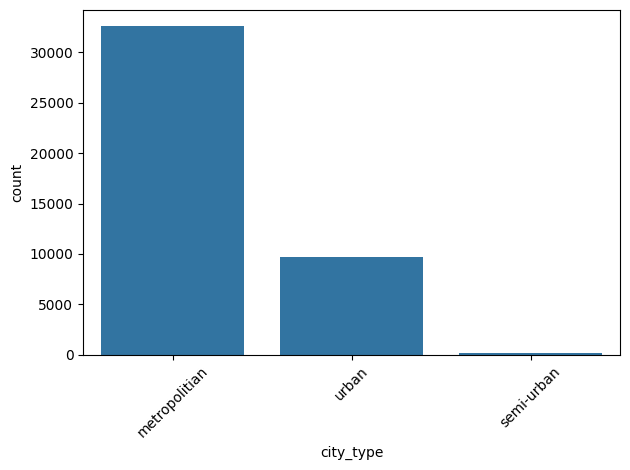

In [457]:
categorical_analysis(df,"city_type")

In [458]:
numerical_categorical_analysis(df,"city_type","time_taken")

In [459]:
anova_test(df,"time_taken","city_type")

P-value: 0.00000
Reject H0 → Significant difference between groups


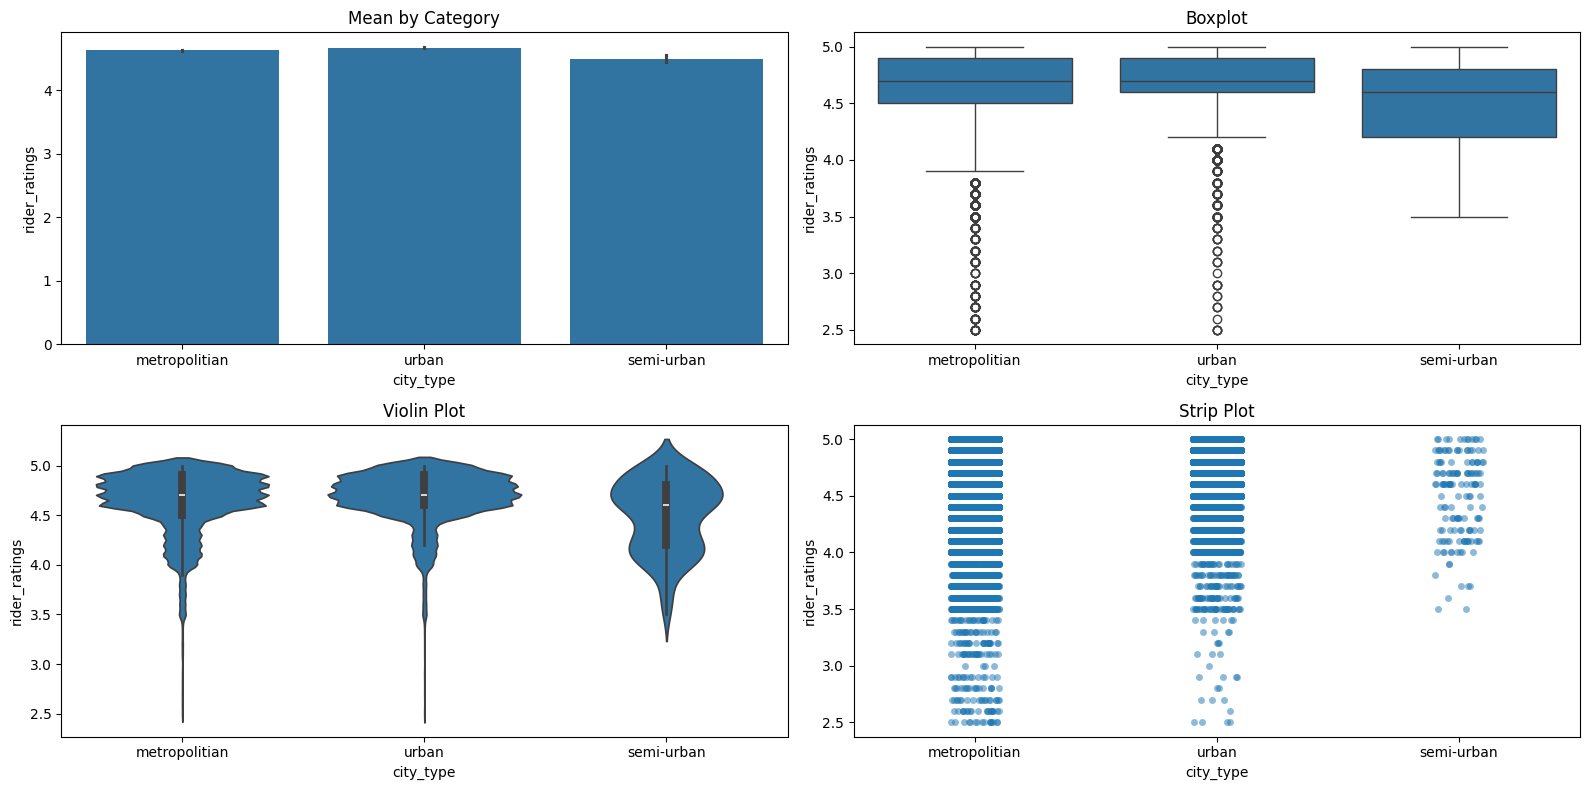

In [460]:
numerical_categorical_analysis(df,"city_type","rider_ratings")

In [461]:
multivariate_analysis(df,"time_taken","city_type","vehicle_type")

## distance

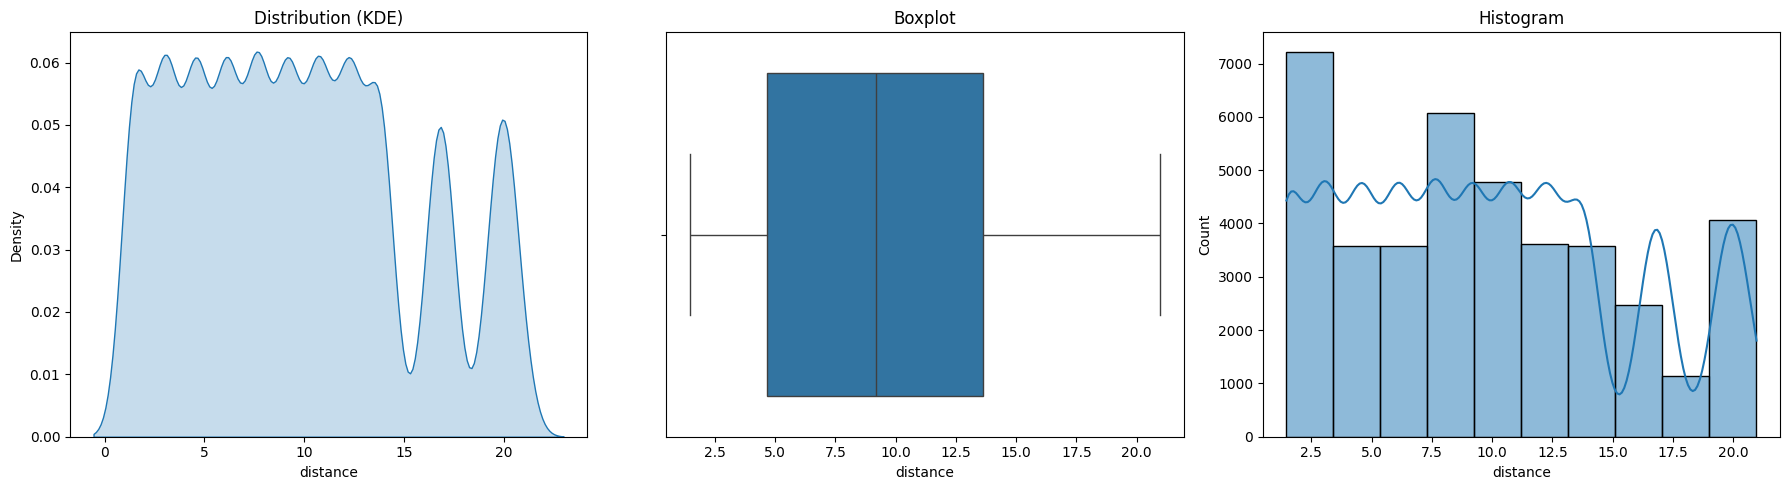

In [462]:
numerical_analysis(df,"distance",bins=10)

In [463]:
sns.scatterplot(df, x="distance",y="time_taken")
plt.show()

In [464]:
df[['distance','time_taken']].corr()

distance  time_taken
distance    1.000000    0.320876
time_taken  0.320876    1.000000

In [465]:
numerical_categorical_analysis(df,"vehicle_type","distance")

In [466]:
numerical_categorical_analysis(df,"distance","festival")

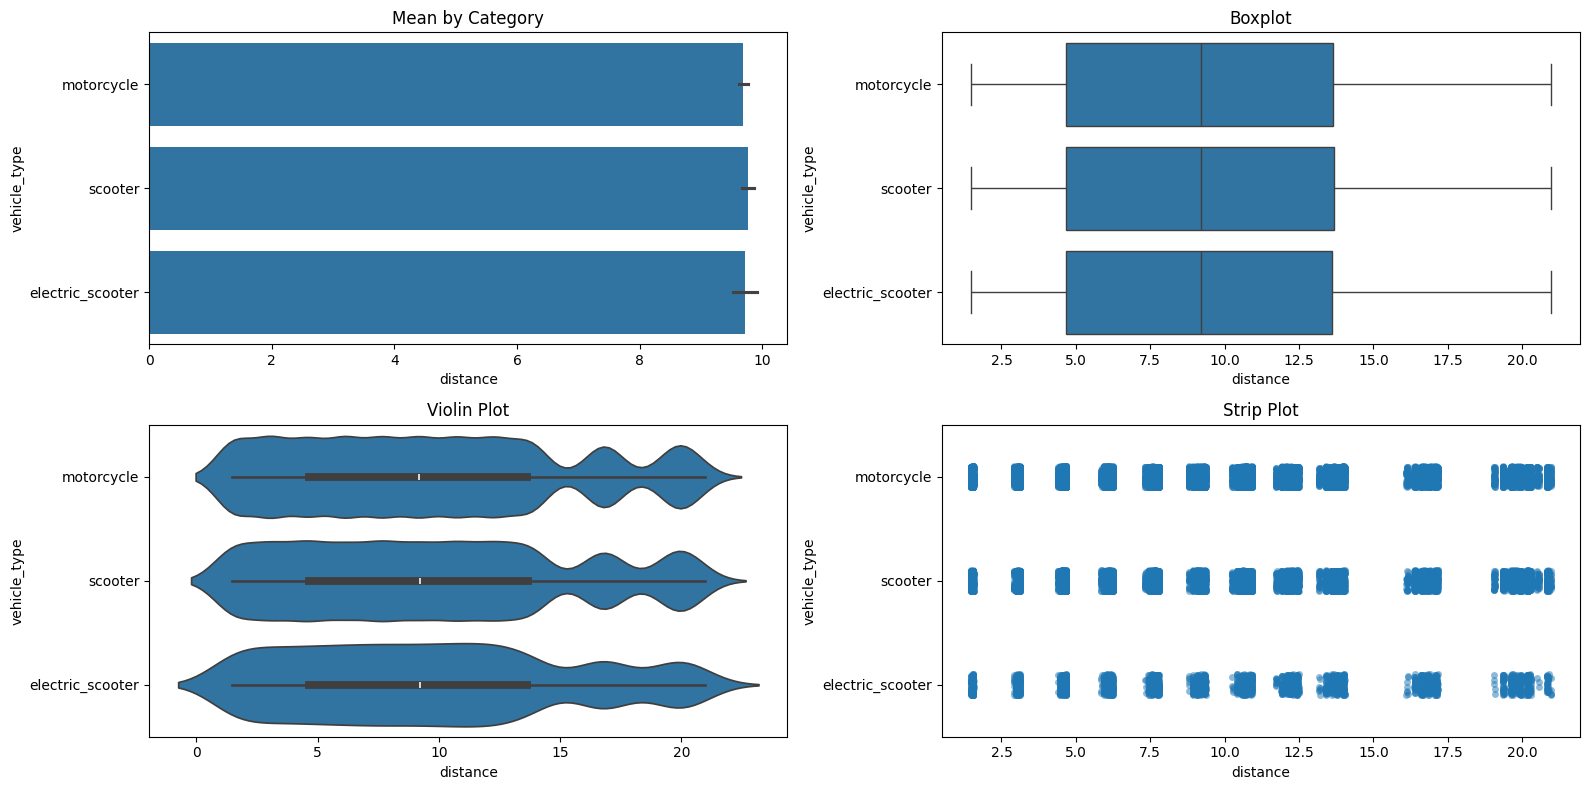

In [467]:
numerical_categorical_analysis(df,"distance","vehicle_type")

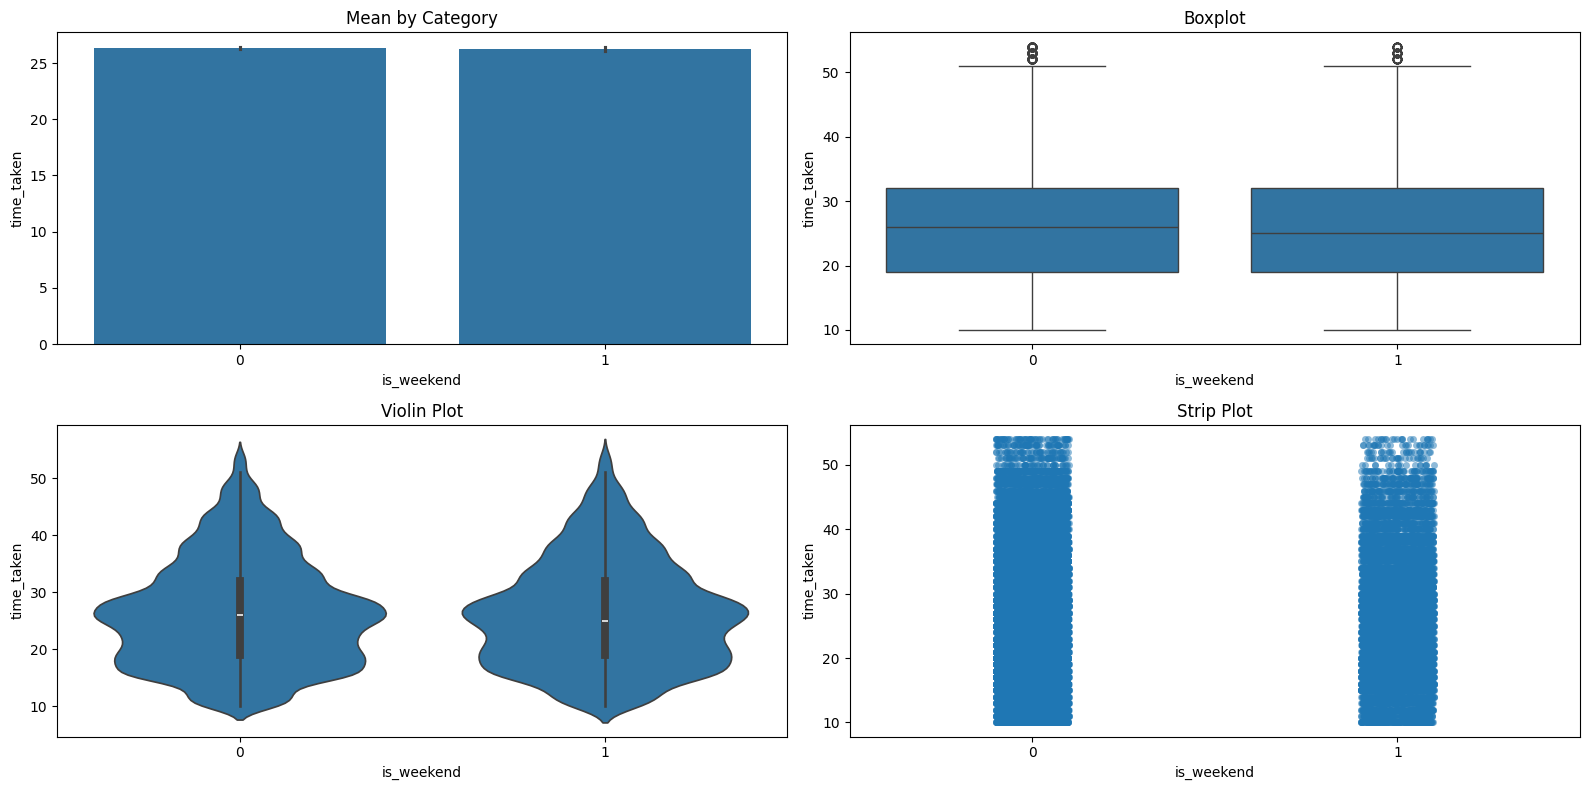

In [468]:
numerical_categorical_analysis(df, "is_weekend", "time_taken")

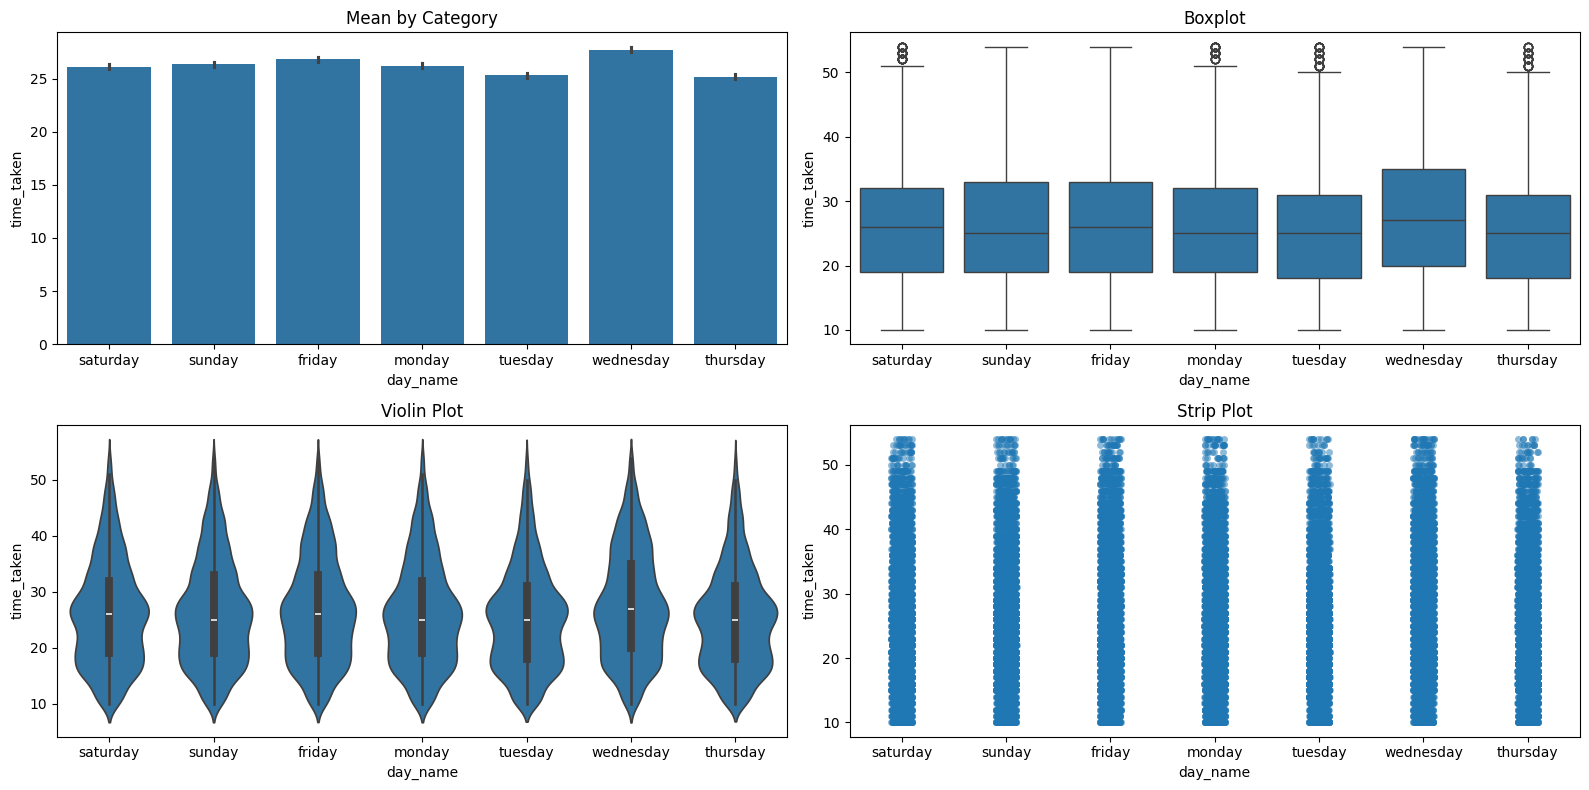

In [469]:
numerical_categorical_analysis(df, "day_name", "time_taken")